In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())

# Unicode 마이너스 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\비어플\\1주차 과제\\train.csv',encoding='cp949')

In [4]:
data.head() #11월 데이터 있는 것 확인

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


# 1. 데이터 설명
- Date : 일/월/연도
- Rented Bike Count : 대여한 자전거 수
- Hour : 시간
- Temperature : 온도
- Humidity : 습도
- Wind Speed : 바람 세기
- Visibility : 가시거리
- Dew Point Temperature : 노점
- Solar Radiation : 태양 복사 에너지
- Rainfall : 강수량
- Snowfall : 강설량
- Seasons : 계절
- Holiday : 휴일 여부
- Functioning day : 자전거 대여 시스템이 정상적으로 운영되는 날

#### 질문 만들기
- 시간대별 자전거 대여량의 차이가 있는지
- 연도별 혹은 월별로 자전거 대여 수의 차이가 있는지
- 가시거리에 따라 자전거 대여량이 어떻게 변하는지
- 다른 기상 조건 (예: 온도, 습도, 강수량)이 자전거 대여에 미치는 영향이 있는지

# 2. 데이터 전처리
1. 분석에 필요할 연, 월, 일 칼럼 만들기

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-10-24,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,2018-05-01,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,2018-11-14,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,2018-08-31,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,2018-06-26,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-02-08,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,2018-03-28,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,2018-04-30,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,2018-05-29,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [6]:
data['연도'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.year
data['월'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.month
data['일'] = pd.to_datetime(data['Date'],format='%Y%m%d').dt.day
data['요일'] = data['Date'].dt.day_name()
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일
0,2018-10-24,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes,2018,10,24,Wednesday
1,2018-05-01,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes,2018,5,1,Tuesday
2,2018-11-14,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,14,Wednesday
3,2018-08-31,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,8,31,Friday
4,2018-06-26,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes,2018,6,26,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-02-08,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,2,8,Thursday
7004,2018-03-28,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,3,28,Wednesday
7005,2018-04-30,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,4,30,Monday
7006,2018-05-29,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes,2018,5,29,Tuesday


# 3. 데이터 살펴보기

In [7]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일
0,2018-10-24,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes,2018,10,24,Wednesday
1,2018-05-01,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes,2018,5,1,Tuesday
2,2018-11-14,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,14,Wednesday
3,2018-08-31,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,8,31,Friday
4,2018-06-26,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes,2018,6,26,Tuesday


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7008 non-null   datetime64[ns]
 1   Rented Bike Count          7008 non-null   int64         
 2   Hour                       7008 non-null   int64         
 3   Temperature(°C)            6306 non-null   float64       
 4   Humidity(%)                7008 non-null   int64         
 5   Wind speed (m/s)           6303 non-null   float64       
 6   Visibility (10m)           7008 non-null   int64         
 7   Dew point temperature(°C)  7008 non-null   float64       
 8   Solar Radiation (MJ/m2)    7008 non-null   float64       
 9   Rainfall(mm)               7008 non-null   float64       
 10  Snowfall (cm)              7008 non-null   float64       
 11  Seasons                    6309 non-null   object        
 12  Holida

In [9]:
#기술통계량 확인하기
data.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),연도,월,일
count,7008,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,2018-06-01 04:16:38.630136832,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300,2017.915240,6.527397,15.787243
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,2018-03-01 00:00:00,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,2018-06-02 00:00:00,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,2018-09-01 00:00:00,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000
std,NaN,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936,0.278545,3.457024,8.786283


In [10]:
#결측값 확인하기
data.isnull().sum() 

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
연도                             0
월                              0
일                              0
요일                             0
dtype: int64

In [11]:
#중복행 확인하기
data[data.duplicated()] 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일


Text(0.5, 1.0, 'correlation heatmap')

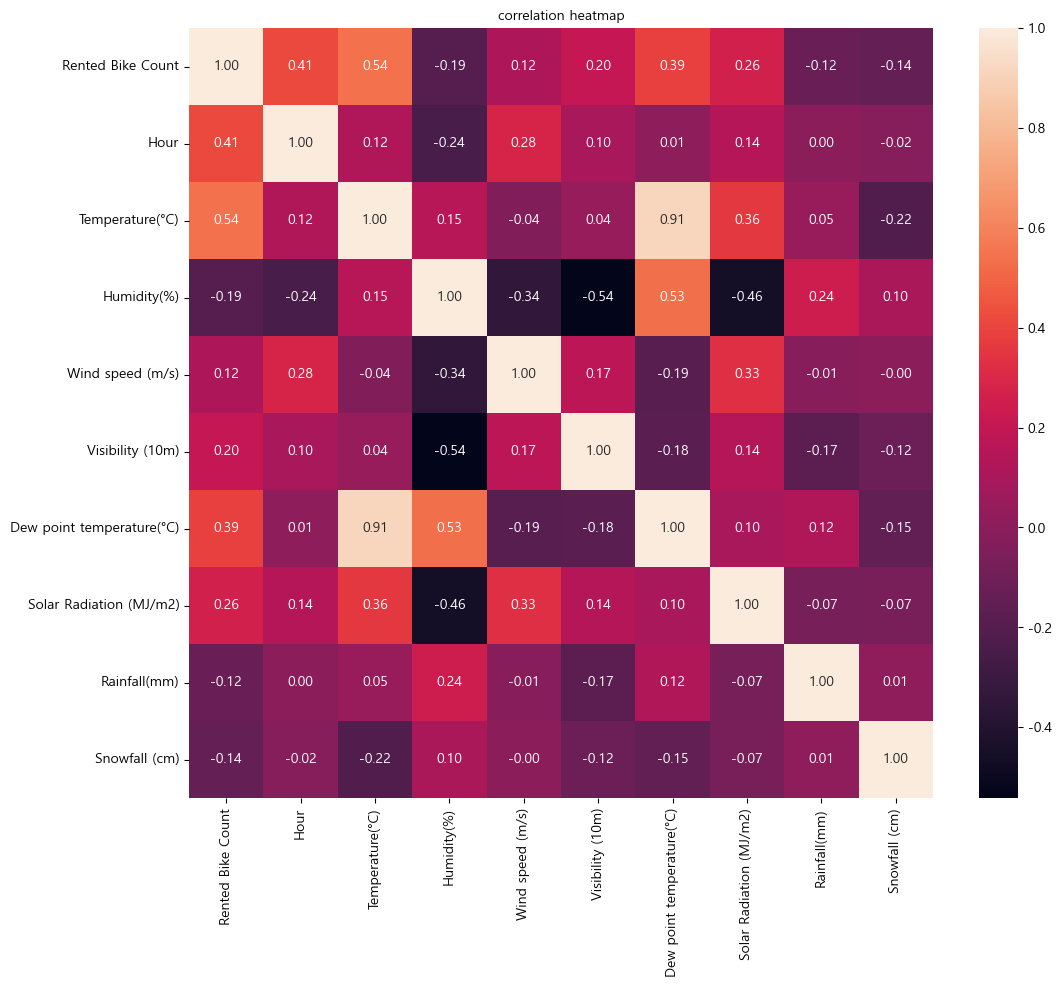

In [12]:
# 상관계수 히트맵 그리기
plt.figure(figsize=(12,10))  #사이즈 조정
sns.heatmap(data[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True,fmt='.2f') #annot는 값  표기
plt.title('correlation heatmap',fontproperties=fontprop) #상관계수 행렬 히트맵

# 4. 결측치 처리

    1. 계절변수 결측치 처리

In [13]:
#Seasons의 값 목록 확인
data['Seasons'].unique()

array([nan, 'Spring', 'Autumn', 'Summer', 'Winter'], dtype=object)

In [14]:
# Seasons의 결측치 대치
# 12, 1, 2월은 Winter, 3, 4, 5월은 Spring, 6, 7, 8월은 Summer, 9, 10, 11월은 Autumn으로 대치
data.loc[data['월'].isin([12, 1, 2]) & data['Seasons'].isna(), 'Seasons'] = 'Winter'
data.loc[data['월'].isin([3, 4, 5]) & data['Seasons'].isna(), 'Seasons'] = 'Spring'
data.loc[data['월'].isin([6, 7, 8]) & data['Seasons'].isna(), 'Seasons'] = 'Summer'
data.loc[data['월'].isin([9, 10, 11]) & data['Seasons'].isna(), 'Seasons'] = 'Autumn'

# 대치된 것 확인
data[['Seasons', '월']]

,Seasons,월
0,Autumn,10
1,Spring,5
2,Autumn,11
3,Summer,8
4,Summer,6
...,...,...
7003,Winter,2
7004,Spring,3
7005,Spring,4
7006,Spring,5


In [15]:
data.isna().sum() #Seasons의 결측치가 모두 대치된 것을 확인

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
연도                             0
월                              0
일                              0
요일                             0
dtype: int64

    2. 풍속 변수 결측치 처리

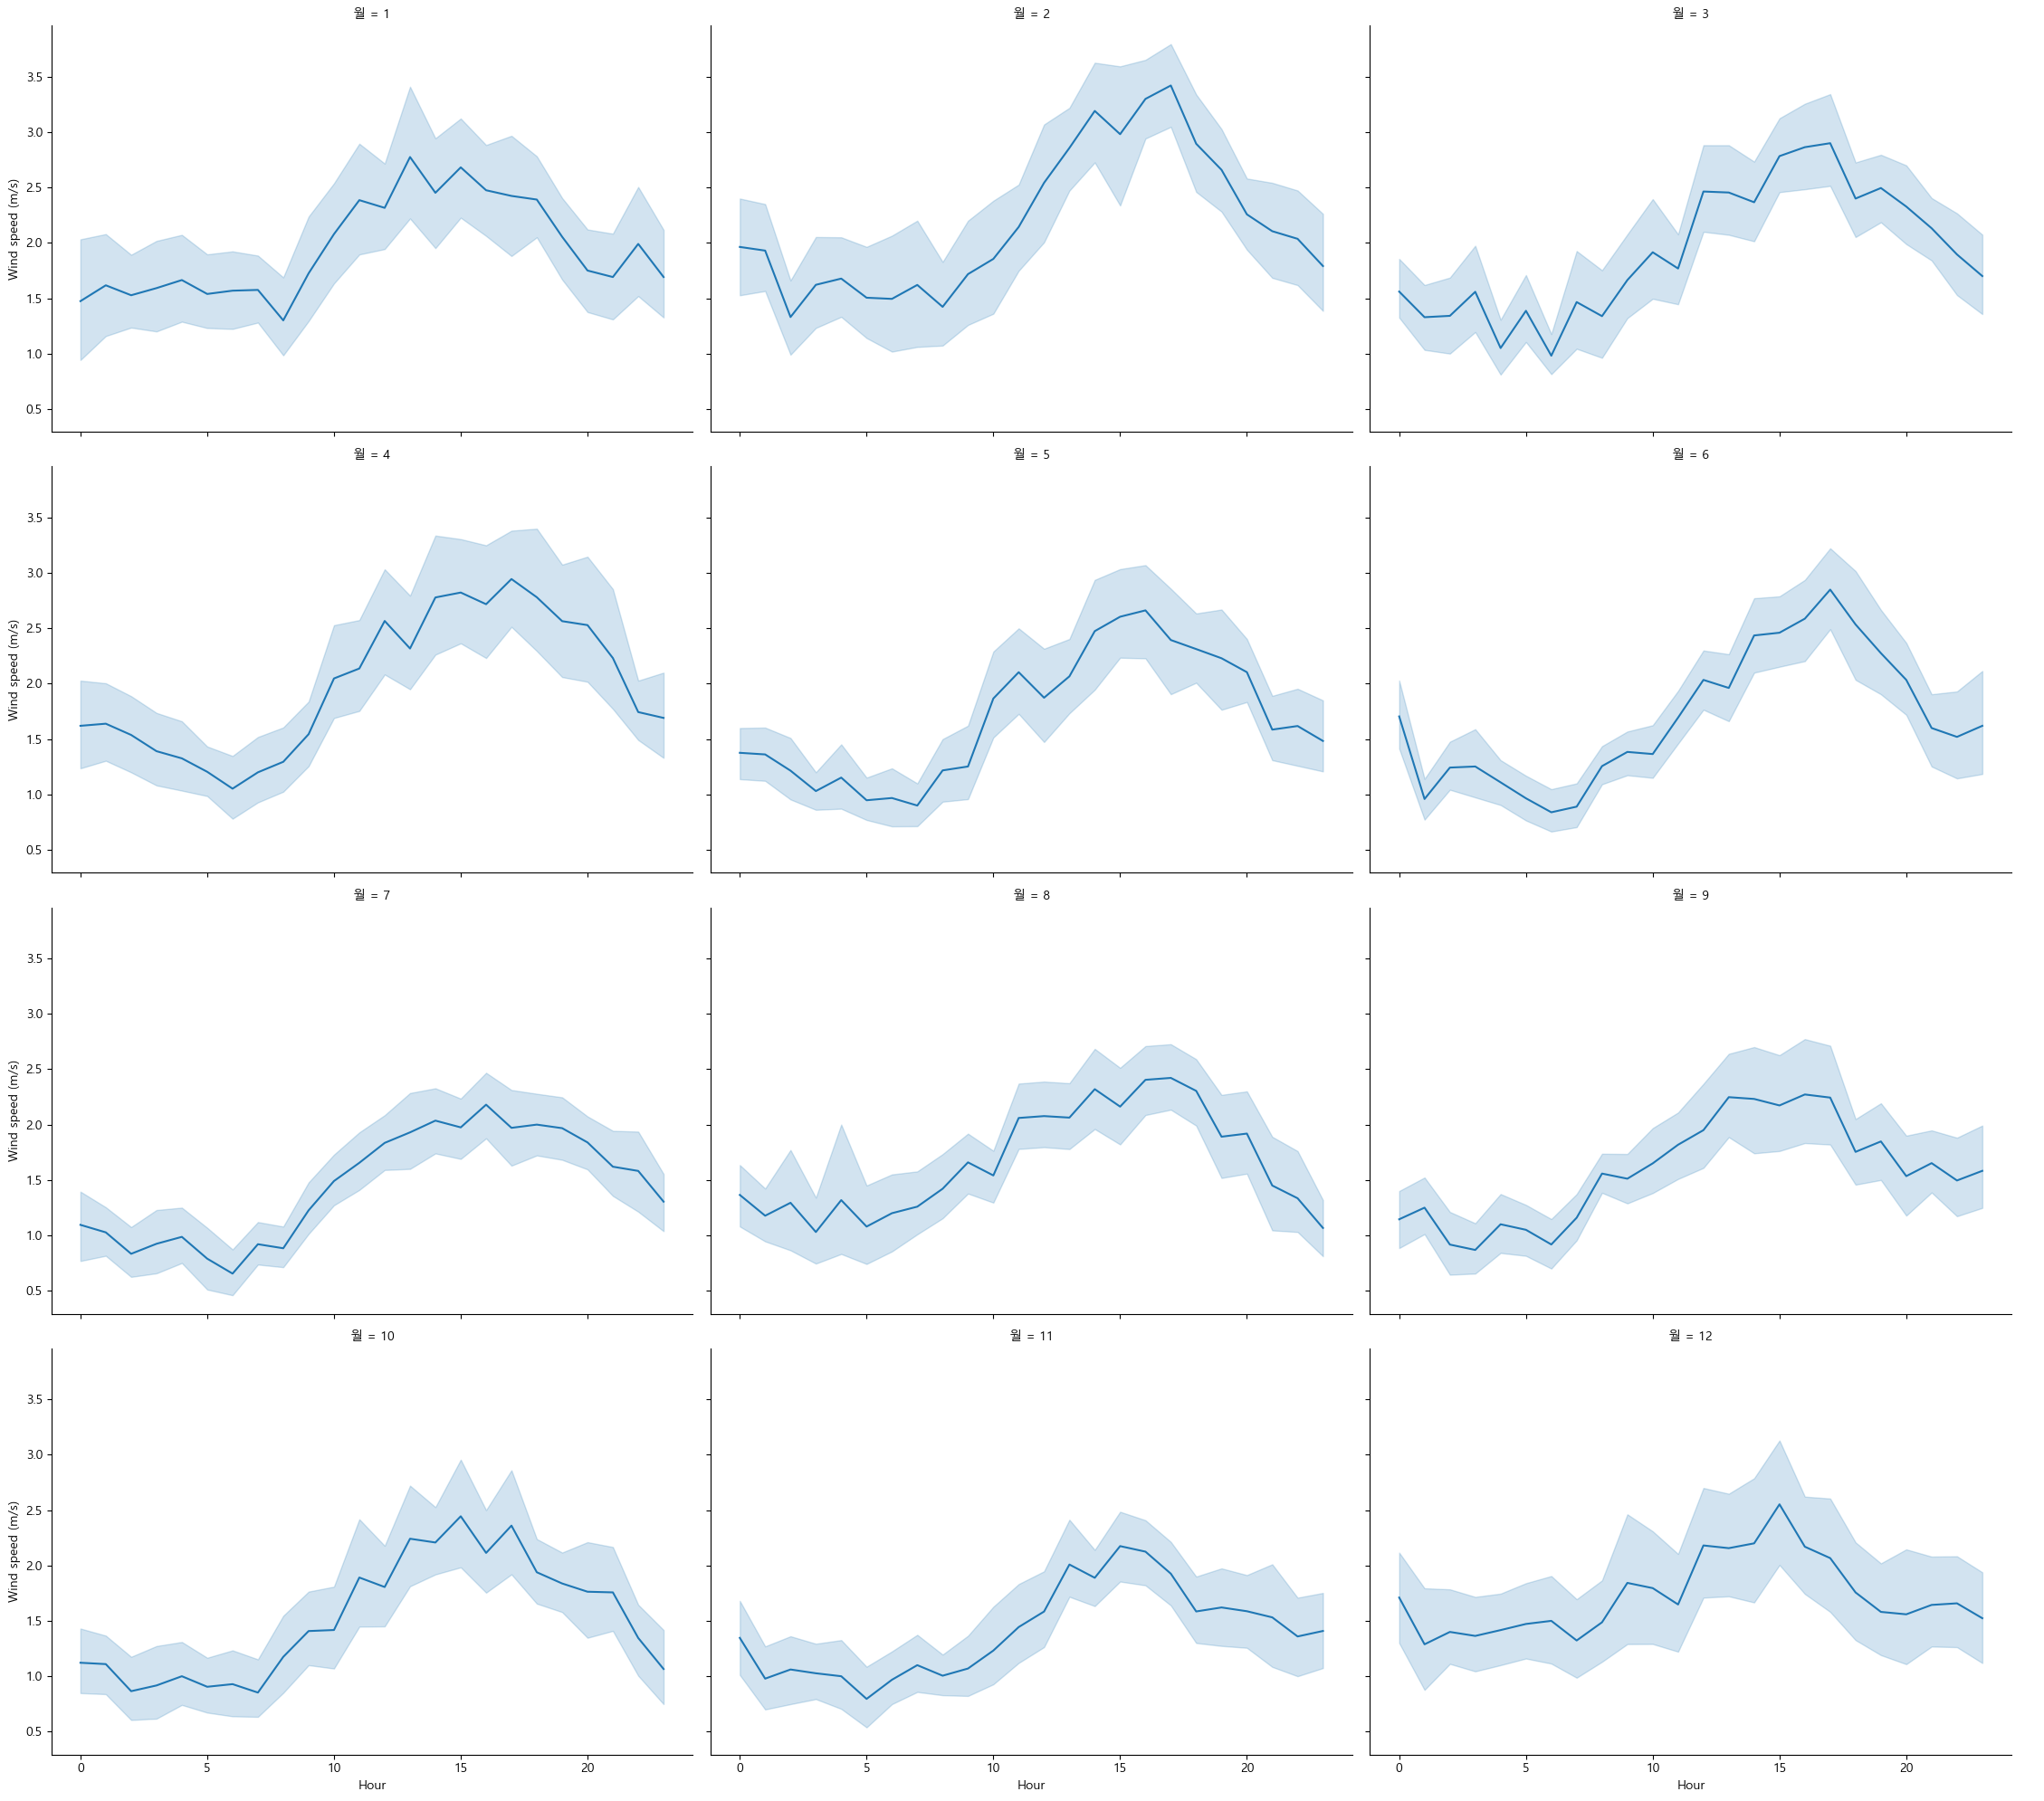

In [16]:
data_Na = data[['월', 'Hour', 'Wind speed (m/s)']].reset_index()

# FacetGrid를 사용하여 시각화
g = sns.FacetGrid(data_Na, col="월", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "Hour", "Wind speed (m/s)")
g.set_axis_labels("Hour", "Wind speed (m/s)")
g.add_legend()

plt.show()

- 풍속 변수는 시계열 데이터이므로 시계열 데이터에 맞는 결측치 대체방법을 사용해야한다.

> 대부분의 시계열 데이터는 비정상이어서 시간에 따라 평균, 분산이 변한다.  
단순 평균,중앙값,최빈값으로 결측치를 처리하는 것은 바람직하지않다.  
따라서 보간법을 이용하고자 한다.  
보간법 :통계적으로 이미 구해진 데이터들로부터 주어진 데이터를 만족하는 근사함수를 구하는 방법론  

1. 선형보간법  
두 점 사이의 직선 경로를 따라 중간 값을 추정  
데이터가 비교적 선형적이고 점진적으로 변화하는 경우에 적합  

2. 비선형 보간법  
데이터의 비선형 패턴을 따라 중간 값을 추정  
데이터가 급격하게 변화하거나 곡선 형태의 패턴을 따르는 경우에 적합  
예: 다항식 보간법 (Polynomial Interpolation)

3. 스플라인 보간법
다수의 다항식을 사용하여 데이터를 부드럽게 연결  
데이터가 부드러운 곡선 형태를 따르며, 특정 구간에서 급격한 변화를 보이는 경우에 적합  
예: 큐빅 스플라인 보간법 (Cubic Spline Interpolation)

- 풍속 데이터를 보면 선형보다 곡선형태의 패턴을 따르는 것 같다. 따라서 3. 스플라인 보간법을 이용해서 결측치를 처리하고자 한다. 

In [17]:
# 풍속 변수의 결측치 확인
print(data['Wind speed (m/s)'].isnull().sum())

# 인덱스를 시간순으로 정렬
data = data.sort_index()

# 스플라인 보간법 (큐빅 스플라인)
try:
    data['Wind speed (m/s)'] = data['Wind speed (m/s)'].interpolate(method='spline', order=3)
except ValueError as e:
    print(f"Error occurred: {e}")


705


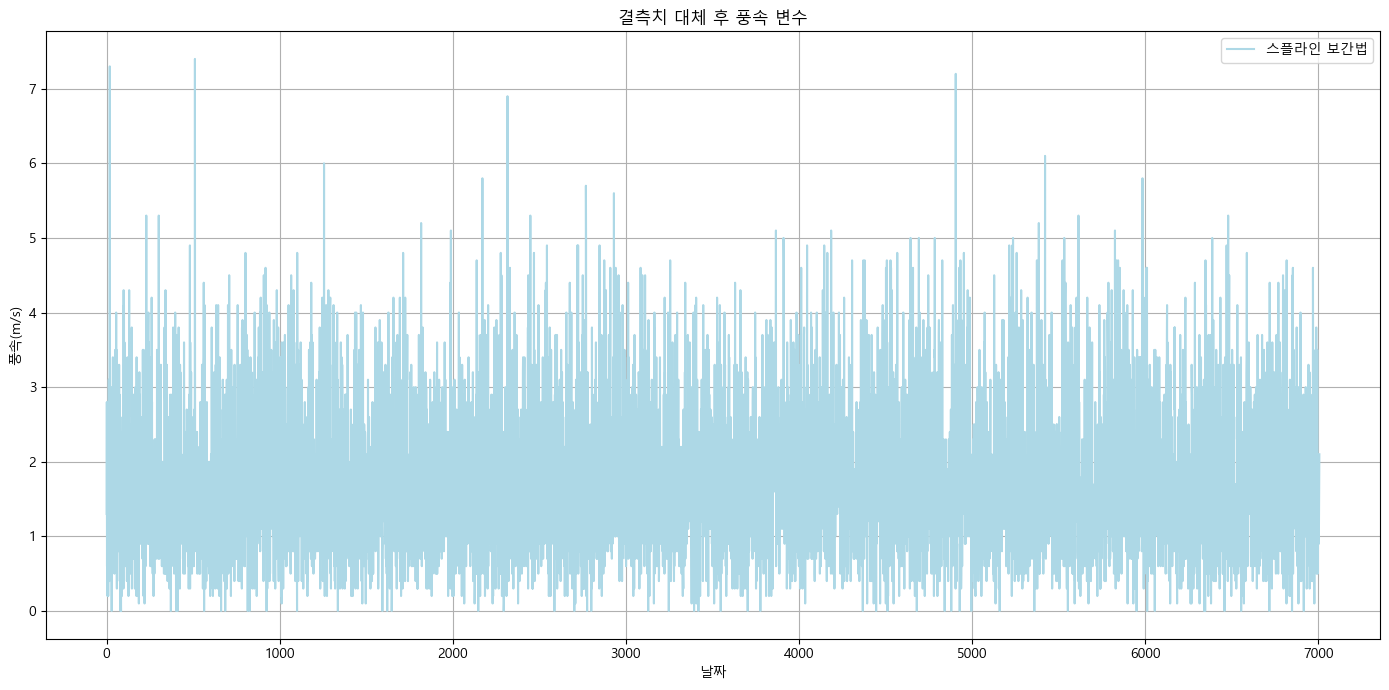

In [18]:
# 그래프 시각화
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Wind speed (m/s)'], label='스플라인 보간법', color='lightblue')
plt.xlabel('날짜')
plt.ylabel('풍속(m/s)')
plt.title('결측치 대체 후 풍속 변수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
data['Wind speed (m/s)'].isna().sum()

np.int64(0)

# 5. 이상치 처리

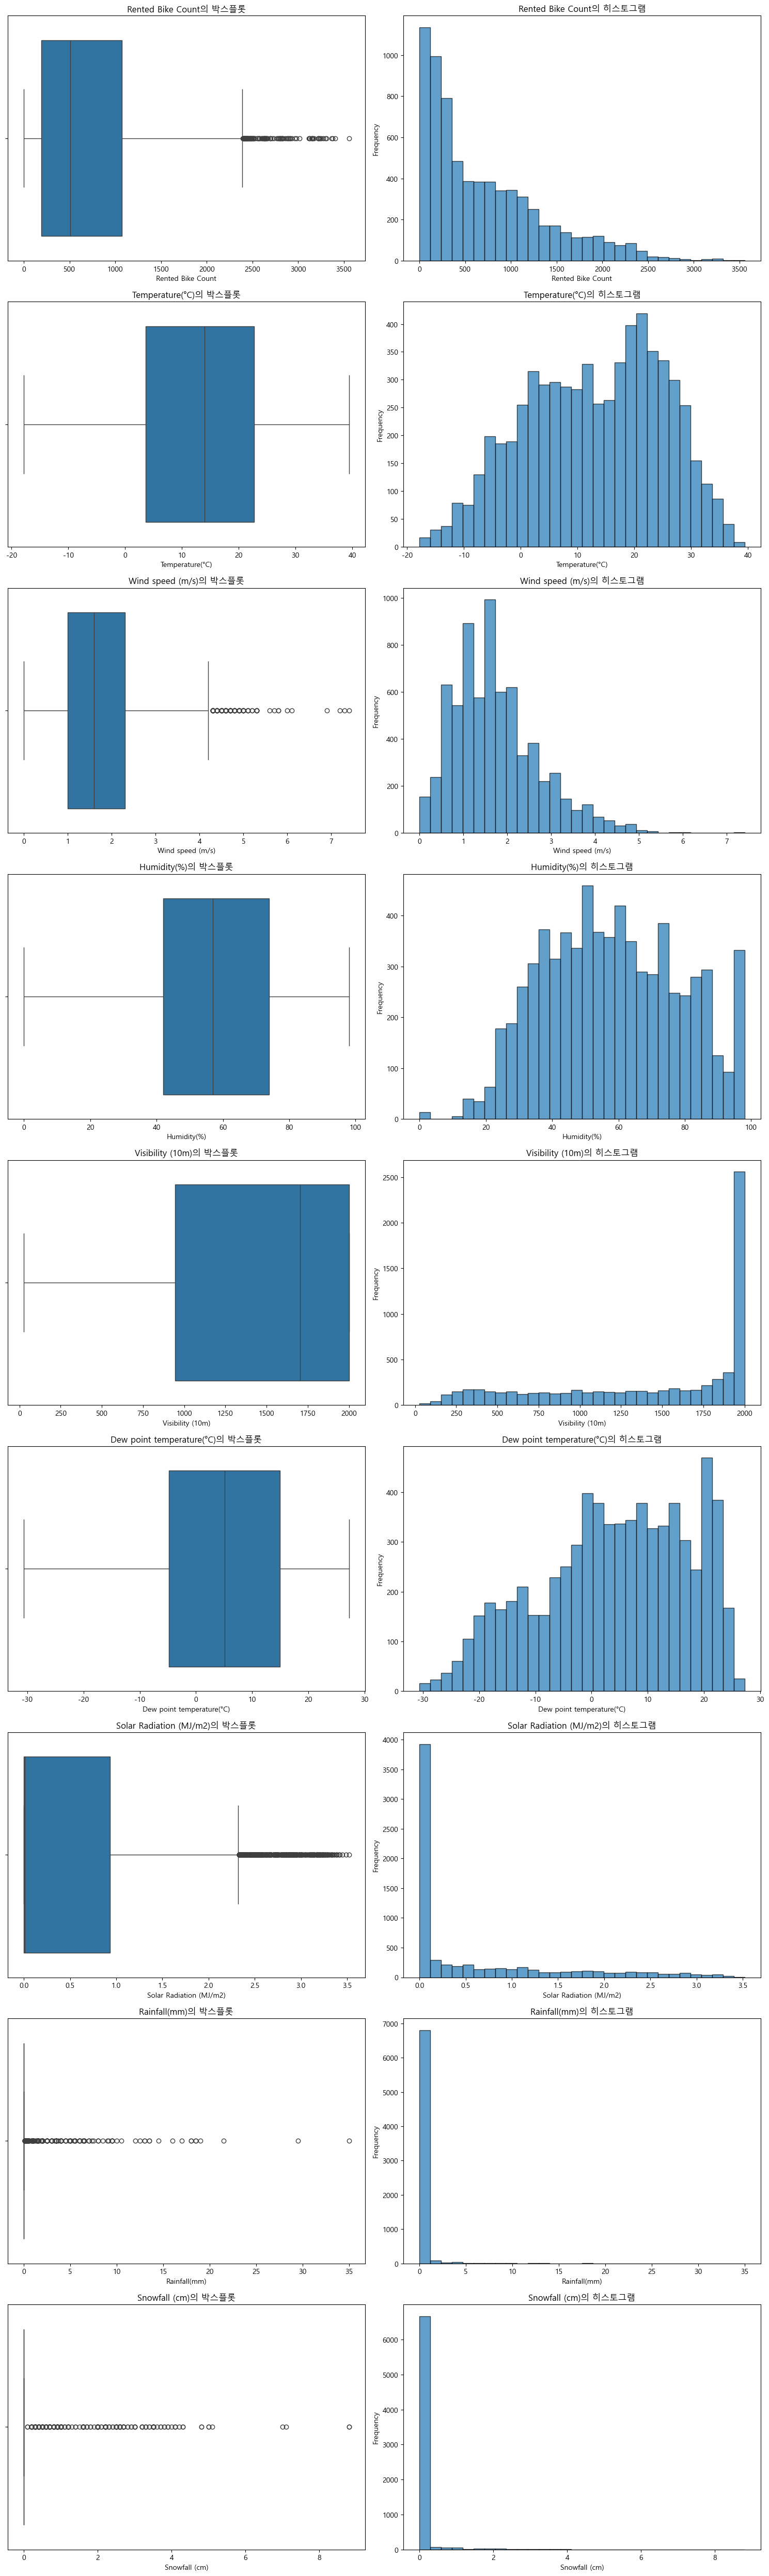

In [20]:
#이상치를 확인할 변수 리스트
variables = [
    'Rented Bike Count', 'Temperature(°C)', 'Wind speed (m/s)', 'Humidity(%)',
    'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 'Snowfall (cm)'
]

# 각 변수에 대해 박스플롯과 히스토그램 그리기
plt.figure(figsize=(15, 50))

for i, var in enumerate(variables):
    # 박스플롯
    plt.subplot(len(variables), 2, 2*i+1)
    sns.boxplot(x=data[var])
    plt.title(f'{var}의 박스플롯')
    plt.xlabel(var)
    
    # 히스토그램
    plt.subplot(len(variables), 2, 2*i+2)
    plt.hist(data[var].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{var}의 히스토그램')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- 박스 플롯 상에서 자전거 대여량, 풍속, 일조량, 강수량, 강설량에 이상치가 있다고 나오지만 모두 측정된 값이므로 이상치를 제거하지않고 그냥 둔다.    
히스토그램을 확인해보면 풍속도 왼쪽으로 치우쳐있고 일조량, 강수량, 강설량은 0값대가 많아 왼쪽으로 치우쳐있다.  
가시거리는 오른쪽으로 치우쳐있지만 이는 2000이상인 값들이 모두 2000으로 표시되었기 때문이므로 뒤에서 범주형으로 변환하는 작업을 할 예정이다.  
이때, 풍속과 습도는 0일 수 없다는 도메인 지식을 활용하여 이상치를 처리해야한다.  

1. 풍속이 0인 값 : NaN으로 바꾼 후, 위에서 사용한 스플라인 보간법을 적용하여 값을 대체한다.
2. 습도가 0인 값 : 이슬점 온도 = 온도 - (100-습도%)/5 공식을 이용하여 갱신한다. 

    1. 풍속이 0인 값

In [21]:
wind_speed_zero_count = (data['Wind speed (m/s)'] == 0).sum()
print(f"풍속이 0인 데이터 개수: {wind_speed_zero_count}")

풍속이 0인 데이터 개수: 51


In [22]:
# 풍속이 0인 값을 NaN으로 처리
data.loc[data['Wind speed (m/s)'] == 0, 'Wind speed (m/s)'] = np.nan

# 결측치 보간
# 스플라인 보간법 (큐빅 스플라인)
try:
    data['Wind speed (m/s)'] = data['Wind speed (m/s)'].interpolate(method='spline', order=3)
except ValueError as e:
    print(f"Error occurred: {e}")

In [23]:
wind_speed_zero_count = (data['Wind speed (m/s)'] == 0).sum()
print(f"풍속이 0인 데이터 개수: {wind_speed_zero_count}")

풍속이 0인 데이터 개수: 0


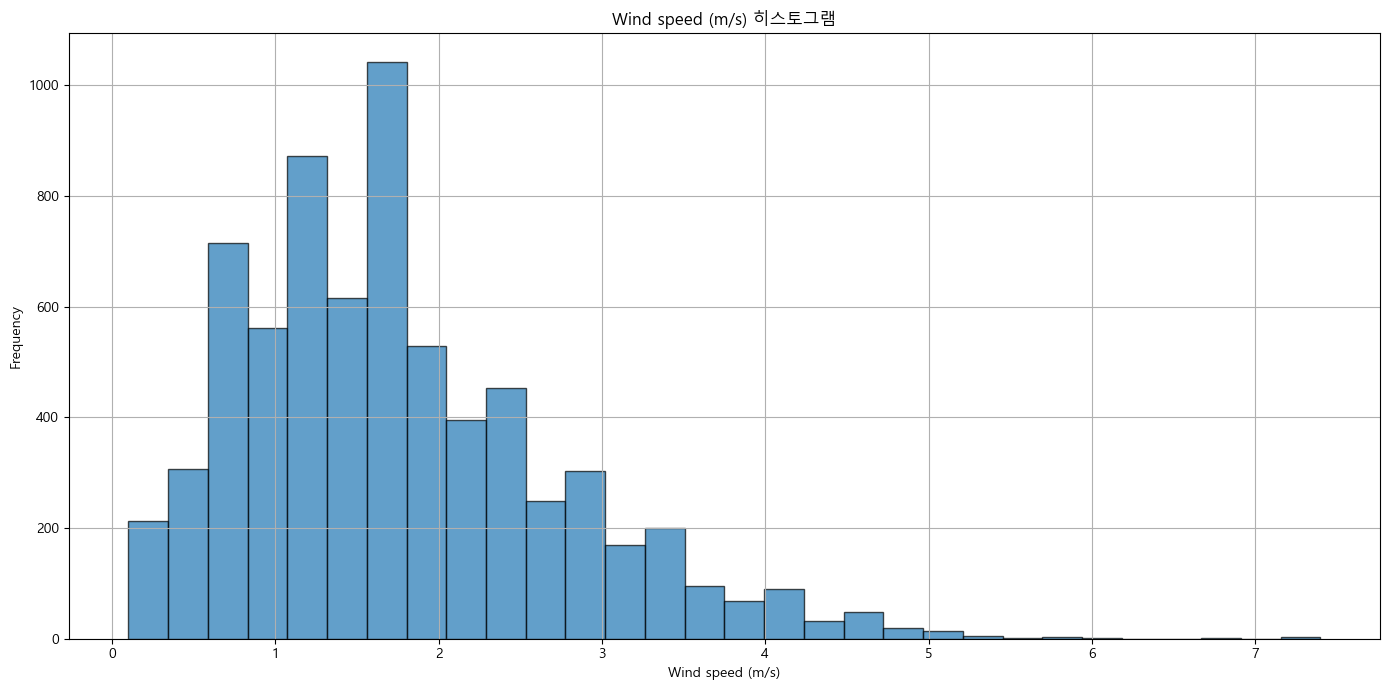

In [24]:
# 풍속 변수에 대해 히스토그램 그리기
plt.figure(figsize=(14, 7))
plt.hist(data['Wind speed (m/s)'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Wind speed (m/s) 히스토그램')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

풍속이 0인 데이터가 다른 값으로 대체된 것을 확인할 수 있다.

    2. 습도가 0인 값

습도의 이상치를 채울 때 기온이 사용되므로 기온의 결측치먼저 처리해야한다. 하지만 기온이 NaN이면서 습도가 0인 경우는 어떻게 할까,,

In [25]:
data.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
연도                             0
월                              0
일                              0
요일                             0
dtype: int64

In [26]:
# 습도가 0이면서 기온이 NaN인 데이터 개수 확인
humidity_zero_temp_nan_count = data[(data['Humidity(%)'] == 0) & (data['Temperature(°C)'].isna())].shape[0]
print(f"습도가 0이면서 기온이 NaN인 데이터 개수: {humidity_zero_temp_nan_count}")

습도가 0이면서 기온이 NaN인 데이터 개수: 1


In [27]:
# 습도가 0인 데이터 개수 확인
humidity_zero_count = (data['Humidity(%)'] == 0).sum()
print(f"그냥 습도가 0인 데이터 개수: {humidity_zero_count}")

그냥 습도가 0인 데이터 개수: 13


In [28]:
data[(data['Humidity(%)'] == 0) & (data['Temperature(°C)'].isna())]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일
3764,2018-05-22,406,3,NaN,0,0.7,1420,10.4,0.0,0.0,0.0,Spring,Holiday,Yes,2018,5,22,Tuesday


습도도 0, 기온도 NaN인 경우가 이 경우 하나뿐이라 삭제해도 분석에 큰 영향을 주지 않을 것 같다.

In [29]:
# 습도가 0이면서 기온이 NaN인 데이터 삭제
data = data.drop(data[(data['Humidity(%)'] == 0) & (data['Temperature(°C)'].isna())].index)

In [30]:
# 습도가 0인 데이터 개수 확인
humidity_zero_count = (data['Humidity(%)'] == 0).sum()
print(f"습도가 0인 데이터 개수: {humidity_zero_count}")

습도가 0인 데이터 개수: 12


In [31]:
# 이슬점, 습도, 온도를 이용해 온도 변수의 결측치를 대체하는 함수
def fill_temperature(dew_point, humidity):
    return dew_point + (100 - humidity) / 5

# 온도 결측치 대체
data['Temperature(°C)'] = data.apply(
    lambda row: fill_temperature(row['Dew point temperature(°C)'], row['Humidity(%)'])
    if np.isnan(row['Temperature(°C)']) else row['Temperature(°C)'],
    axis=1
)

data['Temperature(°C)'].isna().sum()

np.int64(0)

In [32]:
# 이슬점 온도와 온도를 이용하여 습도 갱신
def update_humidity(row):
    if row['Humidity(%)'] == 0 and pd.notnull(row['Temperature(°C)']) and pd.notnull(row['Dew point temperature(°C)']):
        temperature = row['Temperature(°C)']
        dew_point = row['Dew point temperature(°C)']
        return 100 - 5 * (temperature - dew_point)
    return row['Humidity(%)']

# apply를 사용하여 습도 갱신
data['Humidity(%)'] = data.apply(update_humidity, axis=1)

In [33]:
# 습도가 0인 데이터 개수 확인
humidity_zero_count = (data['Humidity(%)'] == 0).sum()
print(f"습도가 0인 데이터 개수: {humidity_zero_count}")

습도가 0인 데이터 개수: 0


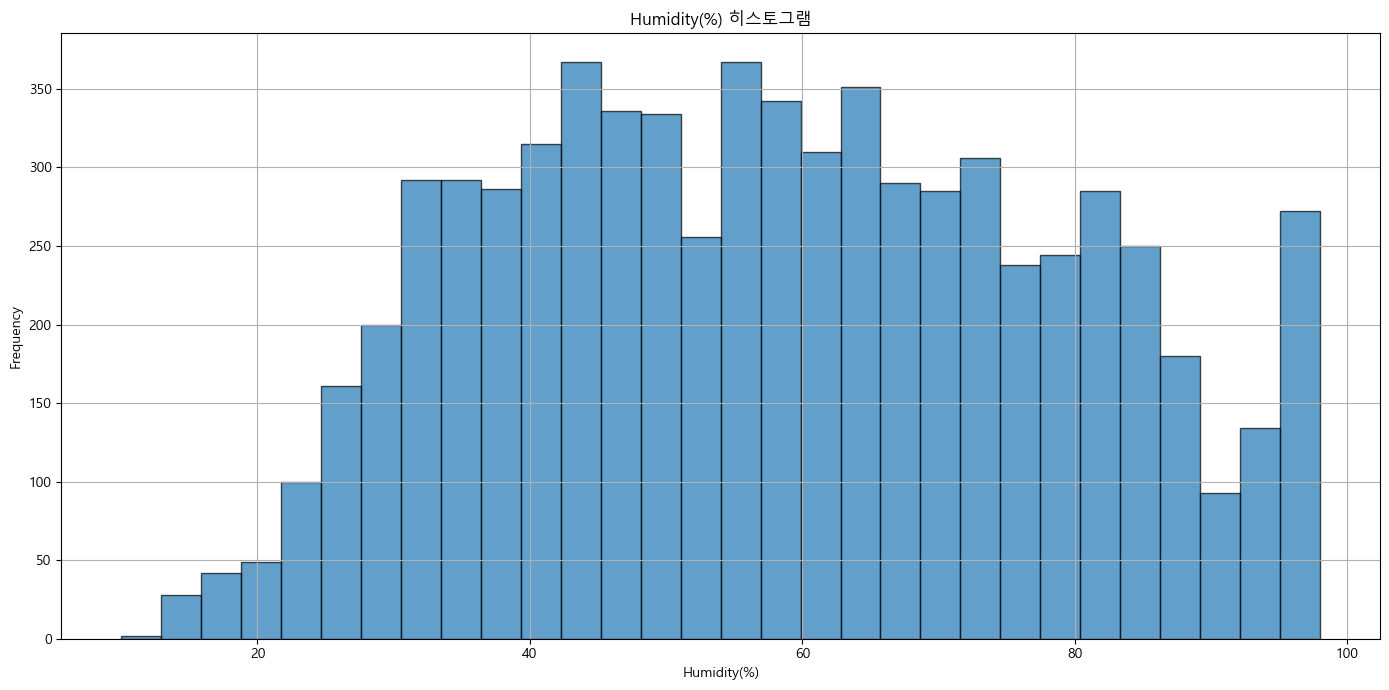

In [34]:
# 습도 변수에 대해 히스토그램 그리기
plt.figure(figsize=(14, 7))
plt.hist(data['Humidity(%)'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Humidity(%) 히스토그램')
plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

습도가 0인 값이 사라졌음을 알 수 있다.

# 6. EDA

    1. 시간대별 대여량

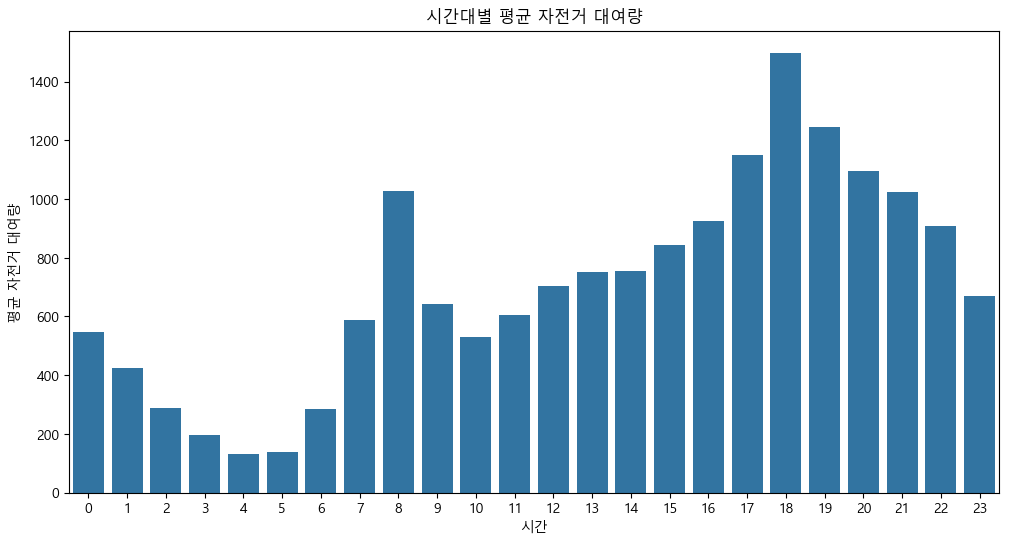

In [35]:
#1. 전체적인 시간대별 대여량 분석
plt.figure(figsize=(12, 6))
hourly_rentals = data.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals)
plt.title('시간대별 평균 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 출퇴근 시간대인 8시, 18시에 대여량이 많으므로 자전거 대여 서비스는 출퇴근 시간에 할인 또는 적립 이벤트를 진행한다면 이용고객 수를 확보할 수 있다고 예상된다.

    2. 계절에 따른 시간대별 자전거 대여량

In [36]:
#계절에 따라 시간대별 자전거 대여량 분석을 위해 계절의 값이 몇 개씩 있는지 파악한다.
data['Seasons'].value_counts() 

Seasons
Summer    1771
Autumn    1760
Winter    1750
Spring    1726
Name: count, dtype: int64

In [37]:
plt.figure(figsize=(12, 6))
season_hourly_rentals = data.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index() #계층적 인덱스를 일반적인 데이터프레임 인덱스로 변환하는 함수
season_hourly_rentals

,Seasons,Hour,Rented Bike Count
0,Autumn,0,604.373333
1,Autumn,1,474.985915
2,Autumn,2,326.057143
3,Autumn,3,224.231884
4,Autumn,4,152.013699
...,...,...,...
91,Winter,19,303.575342
92,Winter,20,240.561644
93,Winter,21,251.070423
94,Winter,22,228.800000


<Figure size 1200x600 with 0 Axes>

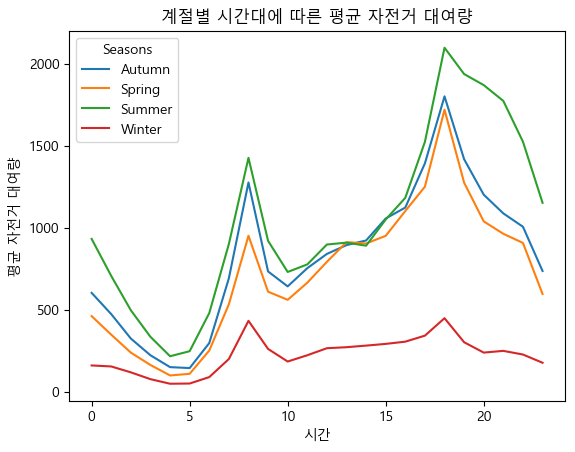

In [38]:
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=season_hourly_rentals)
plt.title('계절별 시간대에 따른 평균 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 비교적 날씨가 선선한 봄, 가을에 대여량이 많을 것으로 예상했는데 여름에 대여량이 가장 많다.
- 또한 여기서도 모든 계절에 출퇴근 시간대인 5~10시, 15~20시의 평균 자전거 대여량이 다른 시간대에 비해 월등히 높다는 것을 확인할 수 있다.
- 겨울에 대여량이 가장 적으므로 거리에 놓인 대여용 자전거의 수를 줄이거나 대여용 자전거의 수리기간으로 활용해도 좋을 것 같다.

    3. 휴일 여부에 따른 시간대별 자전거 대여량

In [39]:
#휴일 여부에 따라 시간대별 자전거 대여량 분석을 위해 휴일 여부의 값이 몇 개씩 있는지 파악한다.
holiday_counts = data['Holiday'].value_counts()
holiday_counts

Holiday
No Holiday    6679
Holiday        328
Name: count, dtype: int64

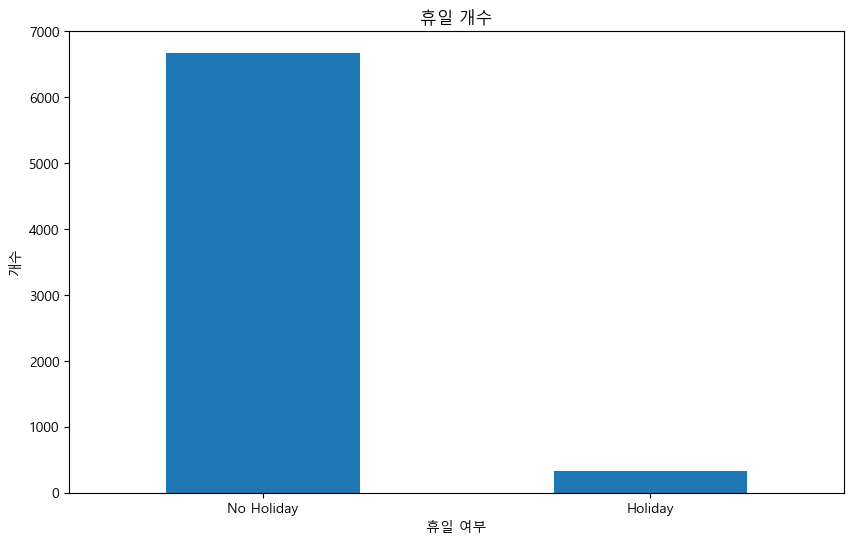

In [40]:
# 막대그래프로 나타내기
plt.figure(figsize=(10, 6))
holiday_counts.plot(kind='bar')
plt.title('휴일 개수')
plt.xlabel('휴일 여부')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.show()

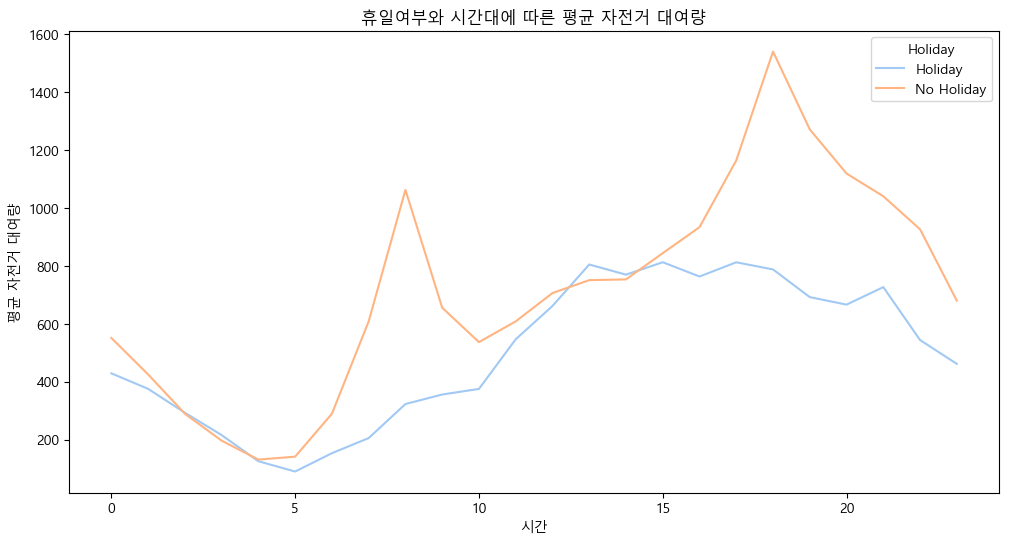

In [41]:
plt.figure(figsize=(12, 6))
holiday_hourly_rentals = data.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=holiday_hourly_rentals, palette="pastel")
plt.title('휴일여부와 시간대에 따른 평균 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 휴일이 아닐 때는 출퇴근 시간인 5시-10시 사이, 15시-20시 사이에 자전거 대여량이 가장 많음을 확인할 수 있다.
- 휴일일 때는 10시 이후부터 급격히 대여량이 증가하고 20시 이후에 감소한다.
- 전반적으로 휴일보다 휴일이 아닌 날에 대여량이 많지만 10시-15시 부근을 보면 휴일에 대여량이 많음을 확인할 수 있는데, 정확한 시간대를 알아보자.

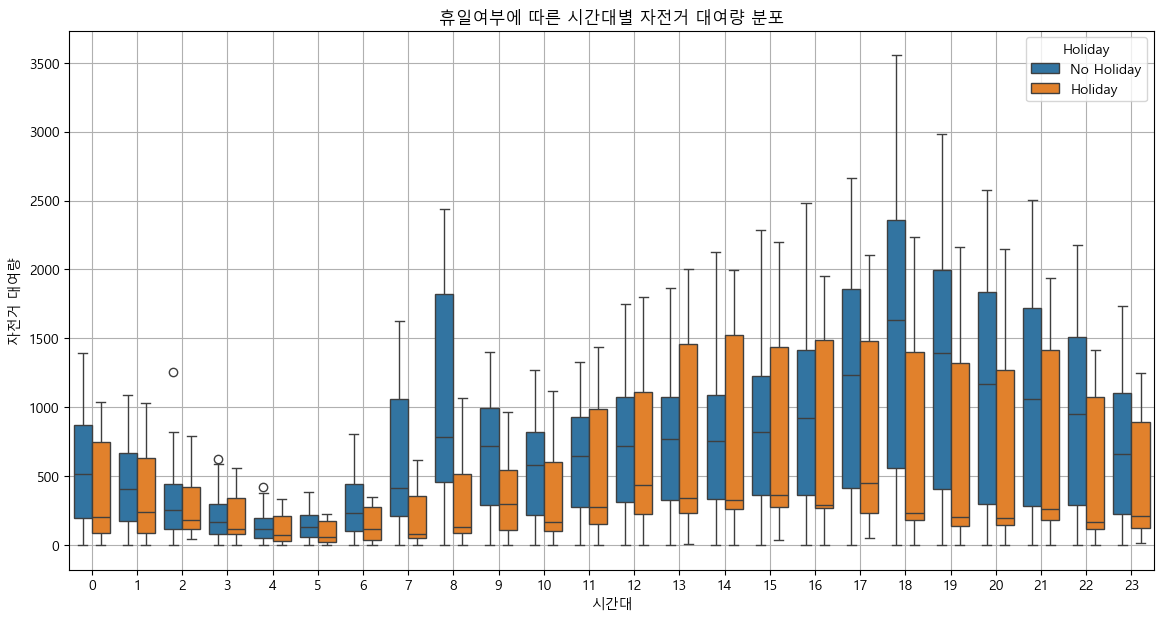

In [42]:
# 박스 플롯 그리기
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.title('휴일여부에 따른 시간대별 자전거 대여량 분포')
plt.xlabel('시간대')
plt.ylabel('자전거 대여량')
plt.legend(title='Holiday')
plt.grid(True)
plt.show()

- 휴일이 아닌 날보다 휴일에 대여량이 많은 시간대는 11시-16시로 출퇴근 시간 전후와 동일하다.
- 결론적으로 휴일이 아닌 날에는 출퇴근 시간대에, 휴일인 날에는 11시-16시에 대여량이 가장 많으므로 <br>해당 시간대에 프로모션을 진행하거나 멤버십혜택을 적용하는 등 활용할 수 있다.

    4. 월별, 요일별 자전거 대여량

In [43]:
data['월'].value_counts()

월
1     616
7     608
10    599
12    594
5     586
6     584
11    582
8     579
9     579
3     570
4     570
2     540
Name: count, dtype: int64

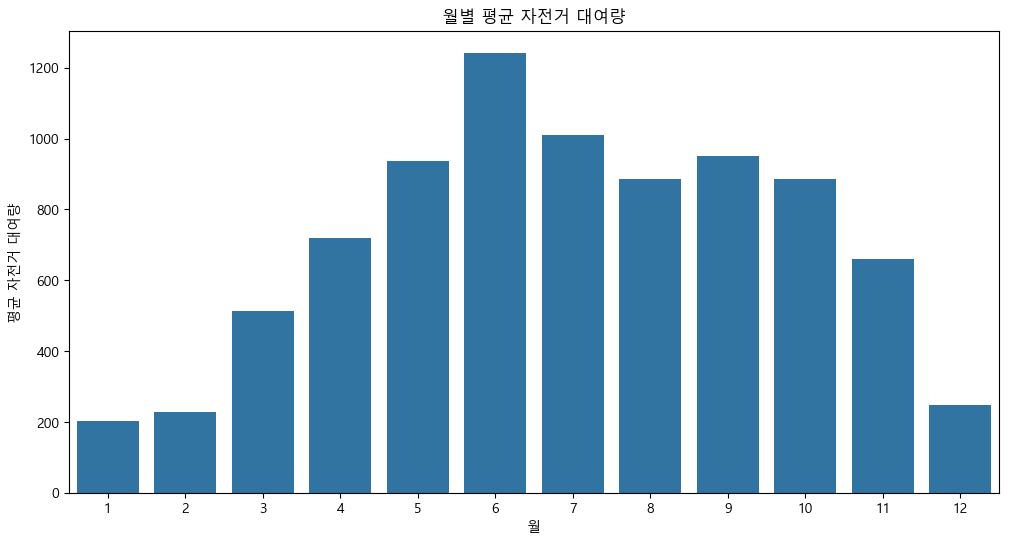

In [44]:
plt.figure(figsize=(12, 6))
monthly_rentals = data.groupby('월')['Rented Bike Count'].mean()
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('월별 평균 자전거 대여량')
plt.xlabel('월')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 상대적으로 겨울(12, 1, 2월)보다 여름(6, 7, 8월)에 자전거 대여량이 많으므로 <br> 여름에 할인율 높은 멤버십 프로모션이나 이벤트를 진행하면 고객유치 효과를 기대할 수 있을 것이다.

> 이유가 무엇일까?  
"여름철은 일반적으로 기온이 높고 날씨가 좋아 야외 활동에 적합하지만, 겨울철은 기온이 낮고 눈이나 비가 많이 내리기 때문에 자전거 타기가 어렵다."는 관점으로  월별 기온과 자전거 대여량의 관계를 분석해보고자 한다. <br> 근거 : 자전거대여량과 기온의 상관계수 0.54로 다른 날씨 변수들보다 가장 높음.


In [45]:
# 월별 평균 기온 계산
monthly_temp = data.groupby('월')['Temperature(°C)'].mean()

# 월별 평균 자전거 대여량 계산
monthly_rentals = data.groupby('월')['Rented Bike Count'].mean()

# 두 데이터를 하나의 데이터프레임으로 결합
monthly_data = pd.DataFrame({
    'Month': monthly_temp.index,
    'Average Temperature (°C)': monthly_temp.values,
    'Average Rented Bike Count': monthly_rentals.values
})

# 월 기준으로 정렬
monthly_data.sort_values('Month', inplace=True)

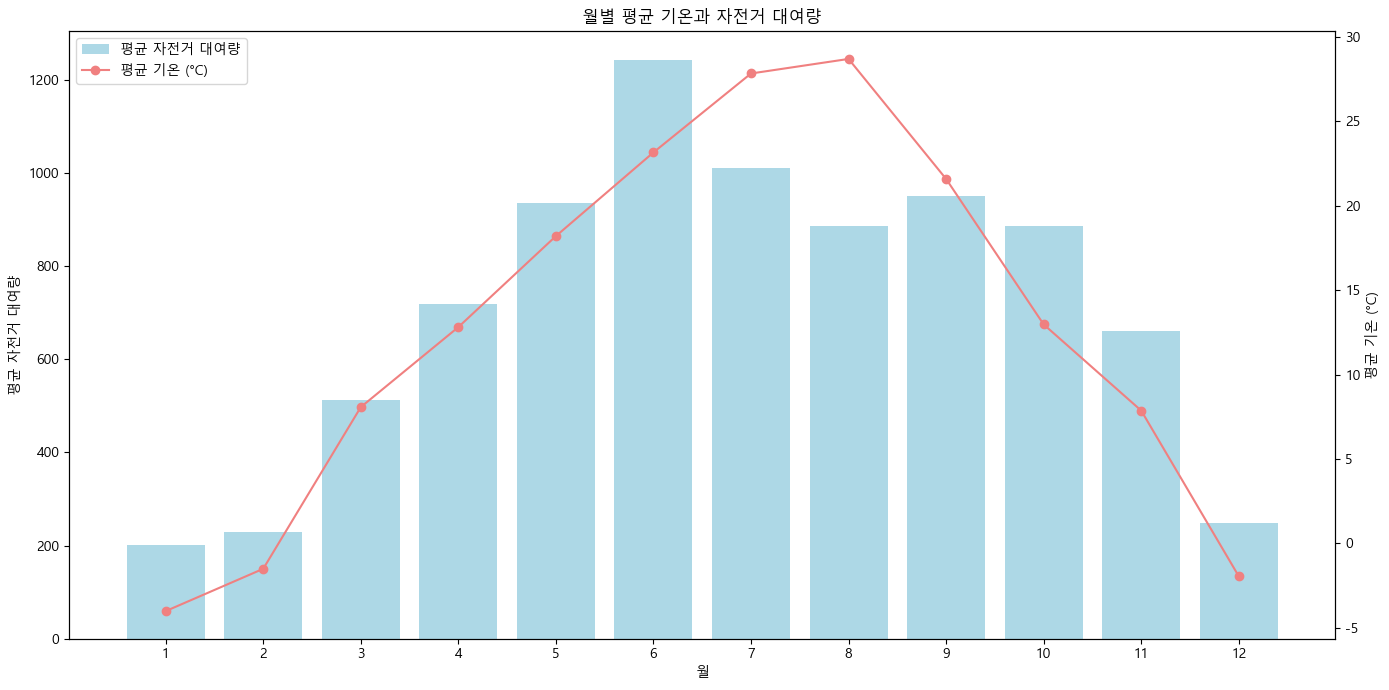

In [46]:
# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

#막대 그래프: 월별 평균 자전거 대여량
bars = ax1.bar(monthly_data['Month'], monthly_data['Average Rented Bike Count'], color='lightblue', label='평균 자전거 대여량')
ax1.set_xlabel('월')
ax1.set_ylabel('평균 자전거 대여량', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(monthly_data['Month'])
ax1.set_xticklabels(monthly_data['Month'])

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 꺾은선 그래프: 월별 평균 기온
line = ax2.plot(monthly_data['Month'], monthly_data['Average Temperature (°C)'], color='lightcoral', marker='o', label='평균 기온 (°C)')
ax2.set_ylabel('평균 기온 (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('월별 평균 기온과 자전거 대여량')

# 범례 설정
bars_legend = [bars]
line_legend = line
ax1.legend(bars_legend + line_legend, ['평균 자전거 대여량', '평균 기온 (°C)'], loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- 이 그래프를 통해 기온과 자전거 대여량 간의 관계를 시각적으로 확인할 수 있다. 
- 여름철 기온이 높아지면 자전거 대여량도 증가하는 경향을 쉽게 파악했다.

> 다른 날씨 조건 중에서도 겨울과 여름에 극명한 차이를 보이는 것이 있는지 확인한다.

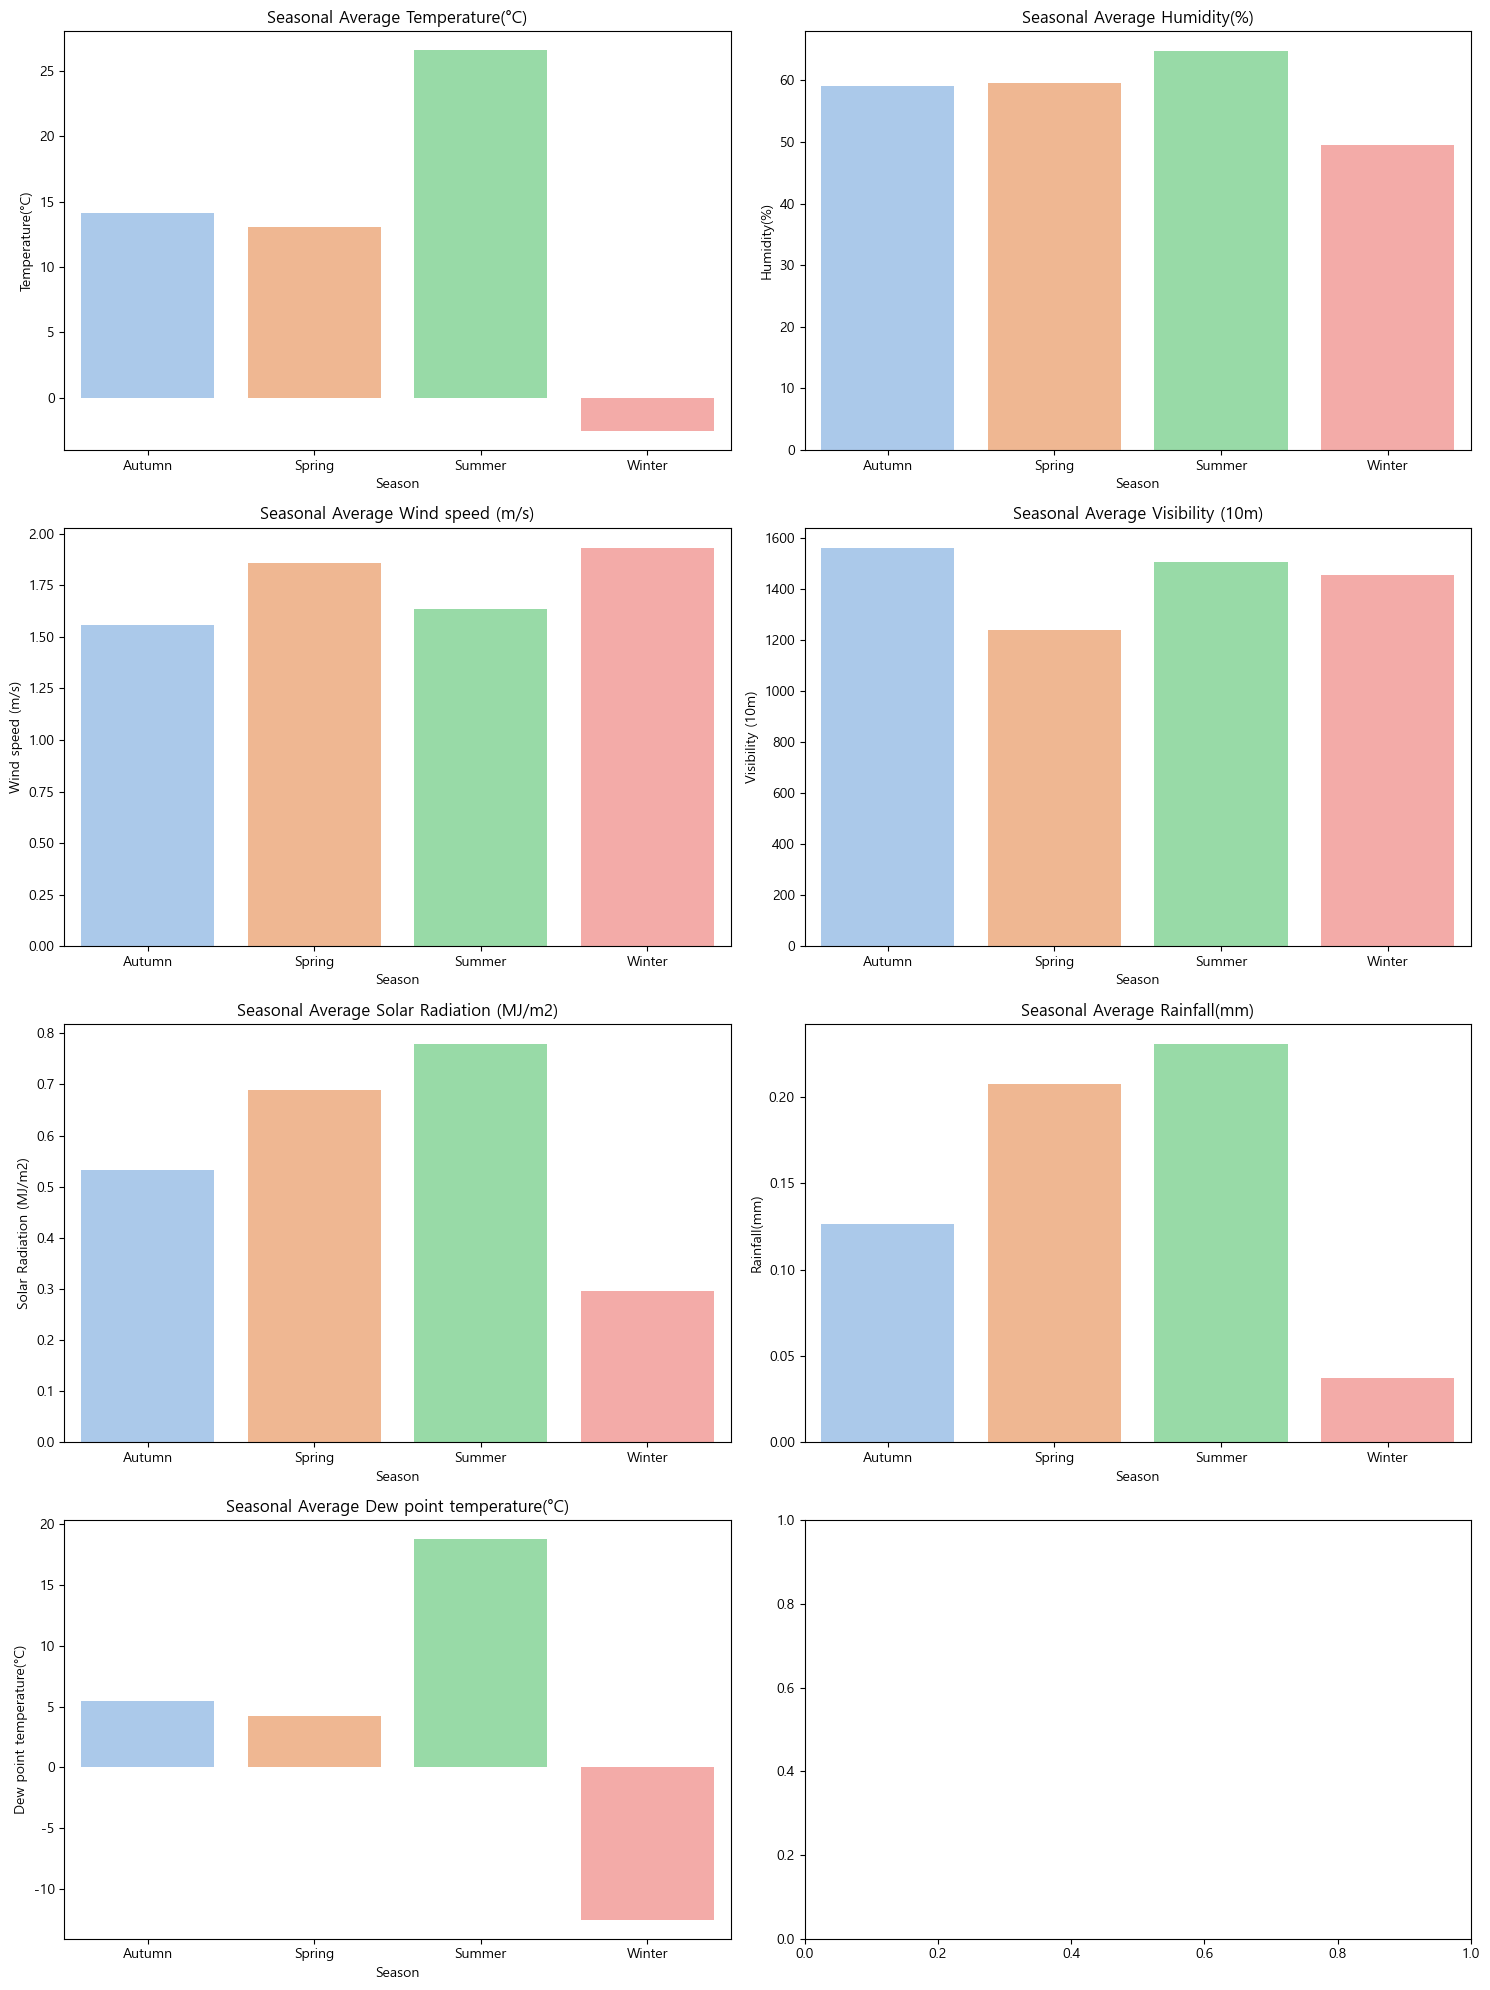

In [47]:
# 계절별 평균 계산
seasonal_data = data.groupby('Seasons').agg({
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Rented Bike Count': 'mean'
}).reset_index()

# 시각화할 변수 목록
variables = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Dew point temperature(°C)']

# 그래프 그리기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.barplot(x='Seasons', y=var, data=seasonal_data, ax=axes[i], palette='pastel', hue='Seasons', dodge=False, legend=False)
    axes[i].set_title(f'Seasonal Average {var}')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

- 기온 변수에서 유의미한 차이를 보임을 다시 확인함.
- 또한 기온과 상관관계가 0.91로 아주 높은 이슬점 온도 변수에서도 위와 같은 극명한 차이를 확인할 수 있었음.
- 가시거리는 여름과 겨울이 큰 차이를 보이지 않음.
- 일조량, 강수량 변수에서 기온 다음으로 여름과 겨울의 유의미한 차이를 확인할 수 있음.

In [48]:
# 요일별 자전거 대여량 계산
data['요일'].value_counts()

요일
Wednesday    1014
Tuesday      1011
Monday       1010
Sunday       1002
Friday        999
Thursday      990
Saturday      981
Name: count, dtype: int64

In [49]:
weekday_rentals = data.groupby('요일')['Rented Bike Count'].mean()

# 요일 순서 정렬
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_rentals = weekday_rentals.reindex(weekday_order)

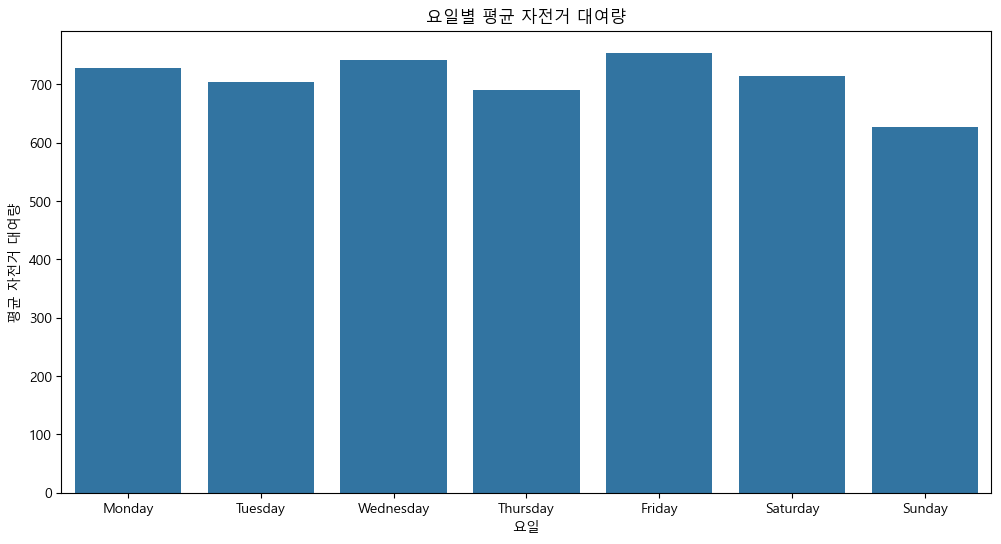

In [50]:
# 요일별 평균 자전거 대여량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_rentals.index, y=weekday_rentals.values)
plt.title('요일별 평균 자전거 대여량')
plt.xlabel('요일')
plt.ylabel('평균 자전거 대여량')
plt.show()

    5. 공휴일과 평일의 평균 자전거 대여량

In [51]:
data['Holiday'].value_counts()

Holiday
No Holiday    6679
Holiday        328
Name: count, dtype: int64

- 공휴일보다 평일의 자료가 훨씬 많으므로 대여량의 차이를 비교하는 것은 유의미하지 않을 것 같다.

In [52]:
#공휴일이면 대여 시스템이 운영을 하고 그렇지 않을 경우 반대인지 확인하기
functioning_holiday = data.groupby(['Functioning Day', 'Holiday']).size().reset_index(name='Count')
functioning_holiday

,Functioning Day,Holiday,Count
0,No,Holiday,19
1,No,No Holiday,217
2,Yes,Holiday,309
3,Yes,No Holiday,6462


- 휴일이 아님에도 자전거 대여 시스템을 운영하지 않는 경우가 217개 존재한다.
- 이유가 뭘까?
1. 수리기간 2. 폭우, 폭설 등 기상악화 상황 3. 도로공사나 마라톤 행사 등으로 간추려보았다.
- 여기서 확인할 수 있는 2번 기상조건을 확인해보자.

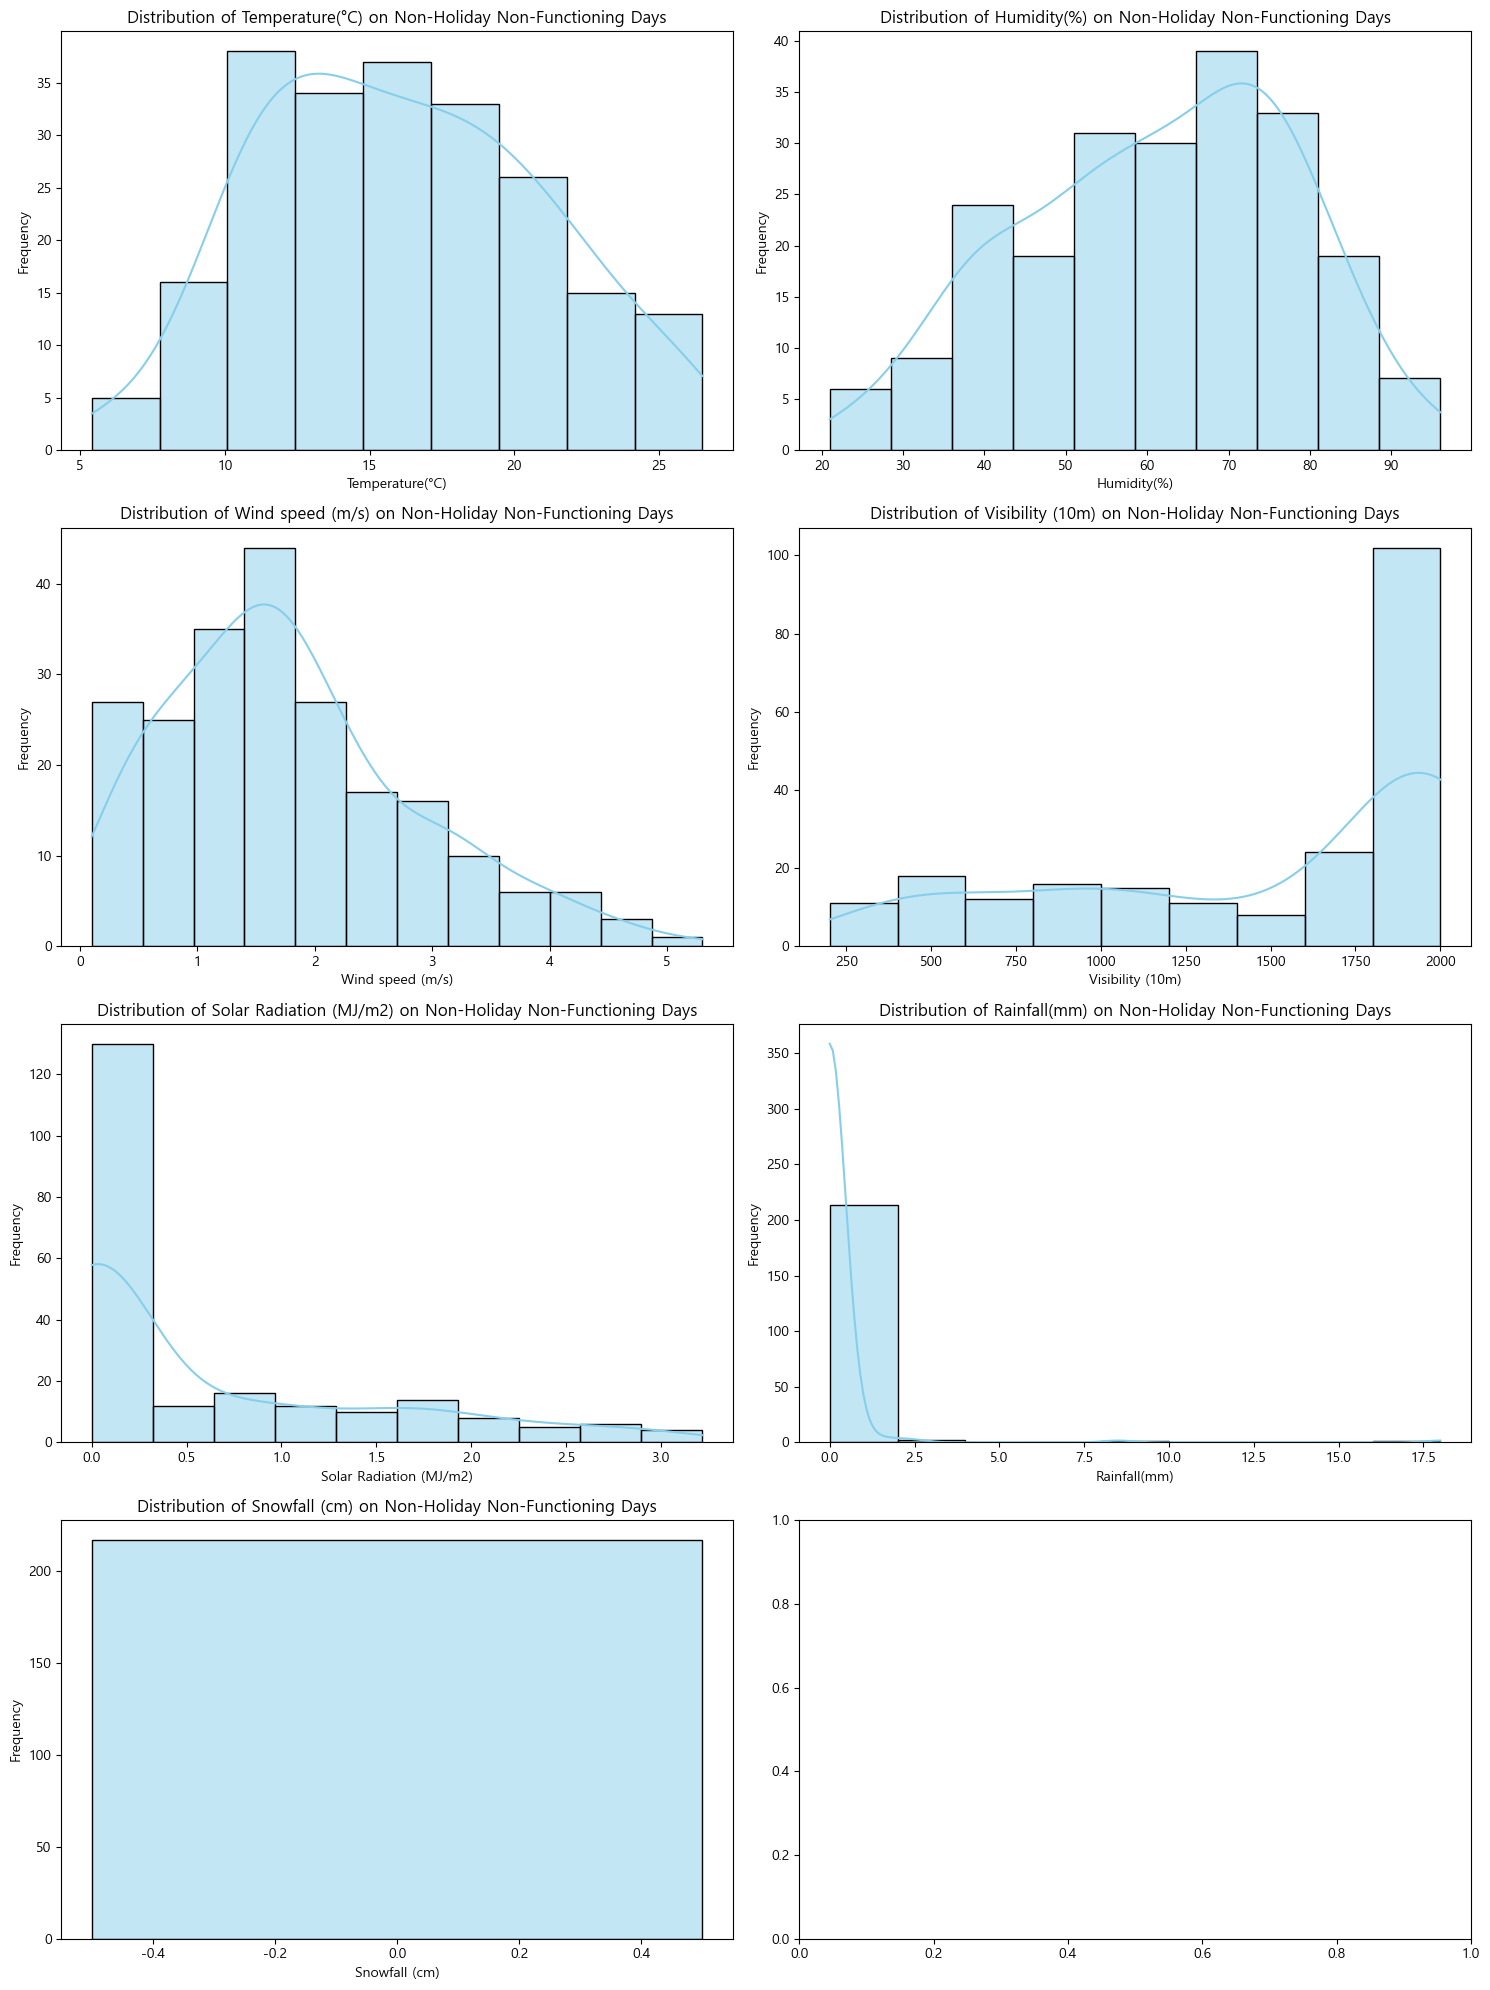

In [53]:
# 공휴일이 아닌데 운영되지 않은 경우 필터링
non_holiday_non_functioning = data[(data['Functioning Day'] == 'No') & (data['Holiday'] == 'No Holiday')]

# 기상 조건 변수들
weather_vars = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# 시각화
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    sns.histplot(non_holiday_non_functioning[var], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {var} on Non-Holiday Non-Functioning Days')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

"No Holiday이면서 Functioningday가 No인 날"의 <br>
1. 기온이 현저히 낮거나 높지않음
2. 습도 또한 정규분포 모양과 유사함
3. 풍속은 약한 경우, 가시거리는 긴 경우가 많음
4. 일조량, 강수량 모두 적은 경우가 많음

=> "No Holiday이면서 Functioningday가 No인 날"의 이유를 기상악화라고 단정지을 충분한 근거가 없어보인다. <br>
=> 1.수리기간 or 3. 도로공사, 마라톤 등 행사일 가능성이 높음

    6. 가시거리

In [54]:
data['Visibility (10m)'].describe()

count    7007.000000
mean     1440.764521
std       607.588748
min        27.000000
25%       946.000000
50%      1703.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

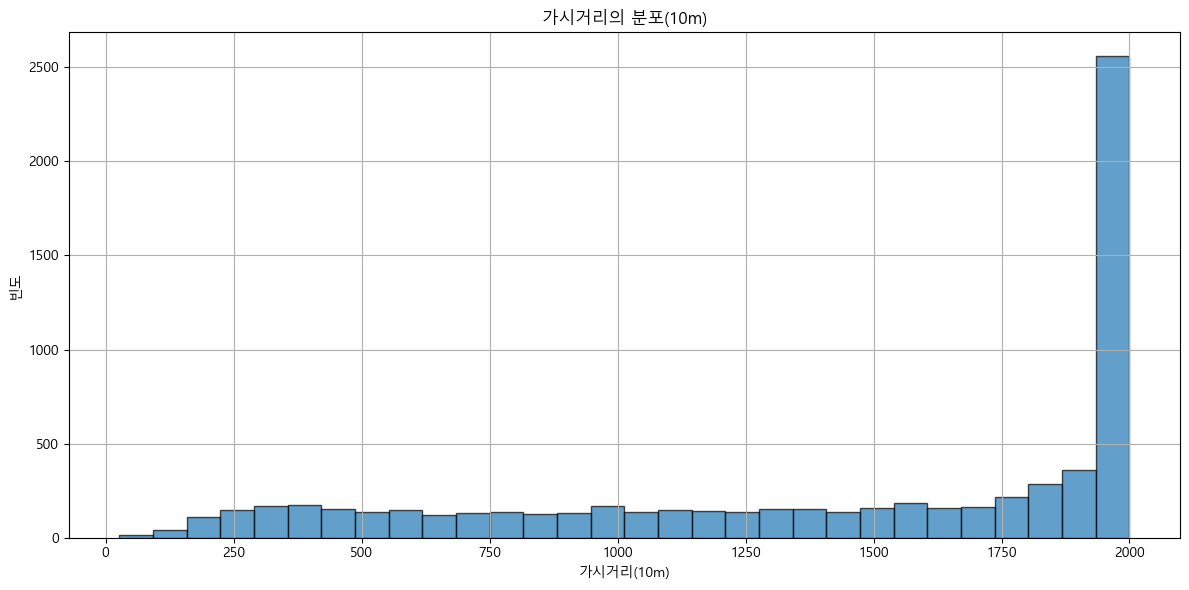

In [55]:
# 변수 자체의 분포 확인하기 (히스토그램으로)
plt.figure(figsize=(12, 6))
plt.hist(data['Visibility (10m)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('가시거리(10m)')
plt.ylabel('빈도')
plt.title('가시거리의 분포(10m)')
plt.grid(True)
plt.tight_layout()
plt.show()

> 2000인 자료가 월등히 많은 이유는 2000m이상일 경우를 모두 2000으로 표시했기 때문이다.<br>
> 따라서 자료를 범주형으로 변환하여 2000에 해당하는 자료는 2000이상으로 표현한다.

In [56]:
# 2000 이상의 데이터를 '2000 이상'으로 변경
data.loc[data['Visibility (10m)'] >= 2000, 'Visibility (10m)'] = 2000

# 2000 이상인 데이터의 개수 확인
count_2000_plus = sum(data['Visibility (10m)'] == 2000)
print(f"Count of 2000 이상: {count_2000_plus}")

Count of 2000 이상: 1831


In [57]:
# '2000 이상' 데이터를 별도로 처리하기 위해 나누기
visibility_less_than_2000 = data[data['Visibility (10m)'] < 2000]
visibility_2000_and_above = data[data['Visibility (10m)'] == 2000]

# 적절한 구간을 설정하여 범주형으로 변환 (구간의 개수는 2000 이상 데이터 개수와 동일하게 설정)
quantiles = visibility_less_than_2000['Visibility (10m)'].quantile([0.33, 0.66]).tolist()
bins = [0] + quantiles + [2000]
labels = ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)]
labels.append('2000 이상')

# 기존 데이터 프레임에 새로운 범주형 변수를 추가하기 위해 빈 열을 생성하고 범주를 설정
data['Visibility Category'] = pd.cut(data['Visibility (10m)'], bins=[0] + quantiles + [2000], labels=labels[:-1], include_lowest=True)
data['Visibility Category'] = data['Visibility Category'].astype(str)
data.loc[data['Visibility (10m)'] == 2000, 'Visibility Category'] = '2000 이상'
data['Visibility Category'] = pd.Categorical(data['Visibility Category'], categories=labels)

# 각 범주별 데이터 개수 확인
visibility_category_counts = data['Visibility Category'].value_counts()
print(visibility_category_counts)

Visibility Category
2000 이상      1831
1668-2000    1760
0-925        1709
925-1668     1707
Name: count, dtype: int64


- 2000에 해당하는 데이터는 2000이상이라는 범주형으로 바꾸고 구간별 데이터 수가 비슷하게끔 나누었다.

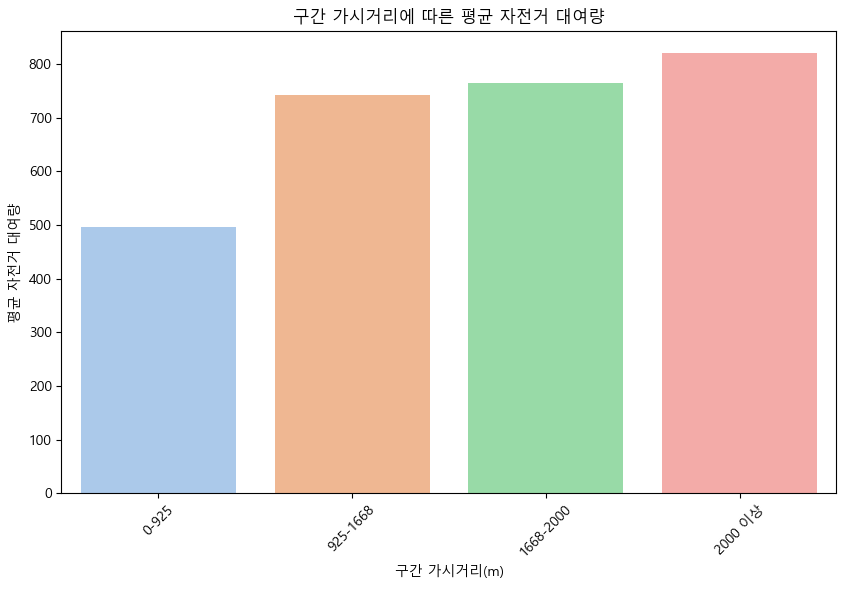

In [58]:
# 구간별 자전거 대여량의 평균 계산
average_rentals_by_visibility = data.groupby('Visibility Category', observed=False)['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Visibility Category', y='Rented Bike Count', data=average_rentals_by_visibility, hue='Visibility Category', dodge=False, palette='pastel', legend=False)
plt.title('구간 가시거리에 따른 평균 자전거 대여량')
plt.xlabel('구간 가시거리(m)')
plt.ylabel('평균 자전거 대여량')
plt.xticks(rotation=45)
plt.show()

- 가시거리가 길수록 자전거 대여량이 많다는 합리적인 결과를 확인할 수 있다.

> 안개는 습도가 높고 기온이 이슬점 온도 이하일 때 형성된다. <br>
> 따라서 기온이 이슬점 온도 이하인 경우만 추출하고 습도와 가시거리의 관계를 분석하여 안개와 가시거리의 관계를 유추하고자 한다.

In [59]:
# 기온이 이슬점보다 낮은 경우만 추출
foggy_conditions = data[data['Temperature(°C)'] < data['Dew point temperature(°C)']]
foggy_conditions

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일,Visibility Category


- 아무 데이터도 출력되지 않는다.
- 기온이 이슬점보다 낮은 경우가 없다는 것이다. 아래에서 자세히 확인해보자.

In [60]:
# 기온과 이슬점의 기본 통계 정보 확인
temperature_stats = data['Temperature(°C)'].describe()
dew_point_stats = data['Dew point temperature(°C)'].describe()

print("Temperature (°C) Stats:")
print(temperature_stats)

print("\nDew Point Temperature (°C) Stats:")
print(dew_point_stats)

Temperature (°C) Stats:
count    7007.000000
mean       12.849179
std        11.968503
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.600000
max        39.400000
Name: Temperature(°C), dtype: float64

Dew Point Temperature (°C) Stats:
count    7007.000000
mean        4.041159
std        13.121966
min       -30.600000
25%        -4.800000
50%         5.100000
75%        14.900000
max        27.200000
Name: Dew point temperature(°C), dtype: float64


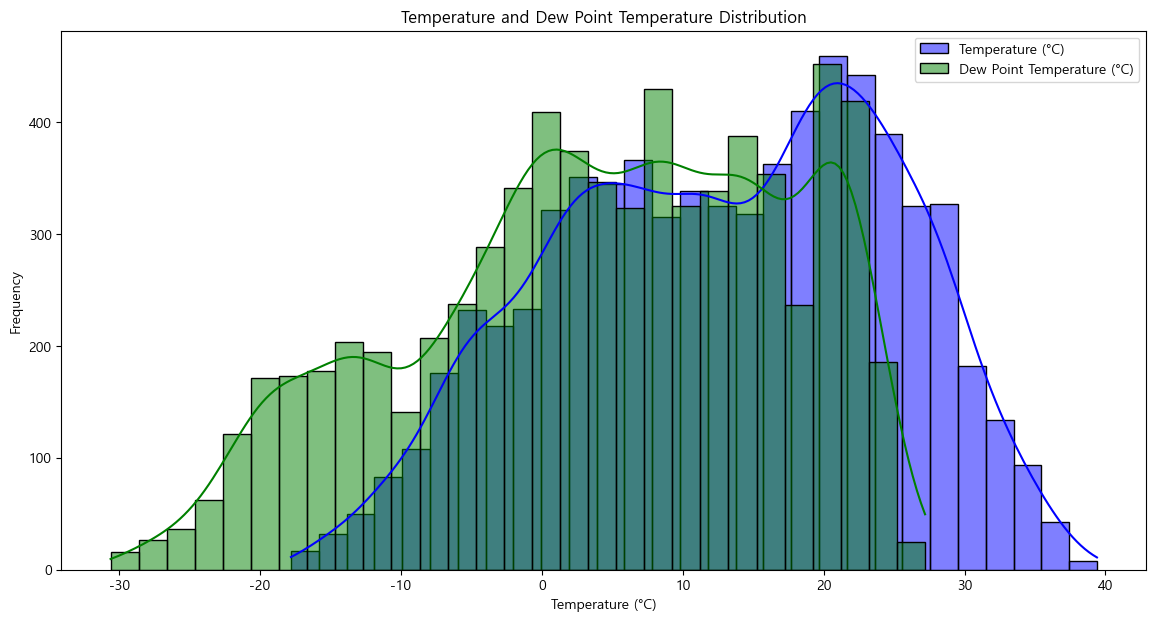

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# 기온과 이슬점의 분포를 히스토그램으로 시각화
sns.histplot(data['Temperature(°C)'], color='blue', label='Temperature (°C)', kde=True)
sns.histplot(data['Dew point temperature(°C)'], color='green', label='Dew Point Temperature (°C)', kde=True)

plt.title('Temperature and Dew Point Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
# 기온과 이슬점의 값을 직접 비교
comparison = data[['Temperature(°C)', 'Dew point temperature(°C)']].head(20)
print(comparison)

    Temperature(°C)  Dew point temperature(°C)
0              16.6                        5.0
1              23.0                       15.8
2               6.2                       -1.2
3              23.2                       20.1
4              23.7                       16.4
5              28.8                       24.7
6              29.3                       21.3
7              21.1                       13.5
8              20.0                       11.7
9               9.2                        3.5
10              3.6                       -9.7
11             12.9                        5.1
12              5.5                      -13.0
13             17.0                       -1.6
14             28.1                       25.1
15             12.5                        5.4
16             11.2                        5.7
17              7.1                        6.0
18             17.9                       11.9
19             12.0                        7.4


- train.csv 파일에 기온이 이슬점온도보다 낮은 경우는 없으므로 안개의 또 다른 조건인 습도가 높은 경우에 대해서 가시거리와의 상관관계를 살펴보고자 한다.

In [63]:
from scipy.stats import linregress

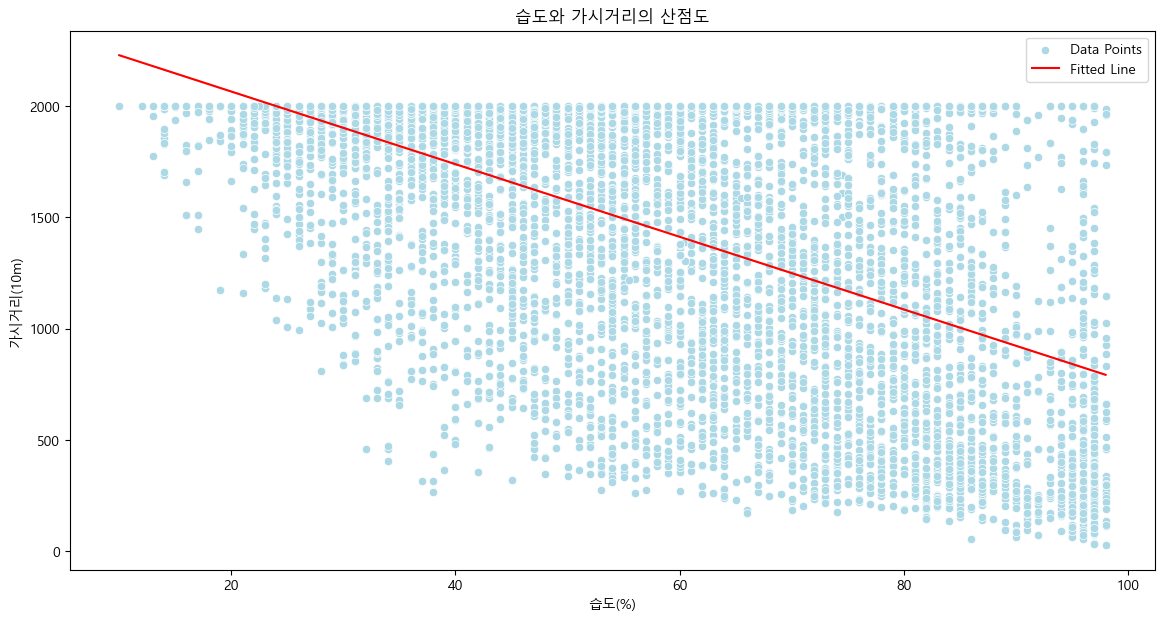

In [64]:
# 산점도 그리기
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Humidity(%)', y='Visibility (10m)', data=data, color='lightblue', label='Data Points')

# 선형 회귀선을 추가
slope, intercept, r_value, p_value, std_err = linregress(data['Humidity(%)'], data['Visibility (10m)'])
sns.lineplot(x=data['Humidity(%)'], y=intercept + slope * data['Humidity(%)'], color='red', label='Fitted Line')

plt.title('습도와 가시거리의 산점도')
plt.xlabel('습도(%)')
plt.ylabel('가시거리(10m)')
plt.legend()
plt.show()

In [65]:
# 상관계수 계산
correlation = data['Humidity(%)'].corr(data['Visibility (10m)'])
print(f"Correlation between Humidity and Visibility: {correlation:.4f}")

Correlation between Humidity and Visibility: -0.5446


- 위의 히트맵에서도 확인할 수 있듯이 습도와 가시거리는 -0.54라는 다소 높은 상관관계를 가지고 있음을 확인했다. 

    6. 강수량

In [66]:
data['Rainfall(mm)'].describe()

count    7007.000000
mean        0.150293
std         1.134678
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

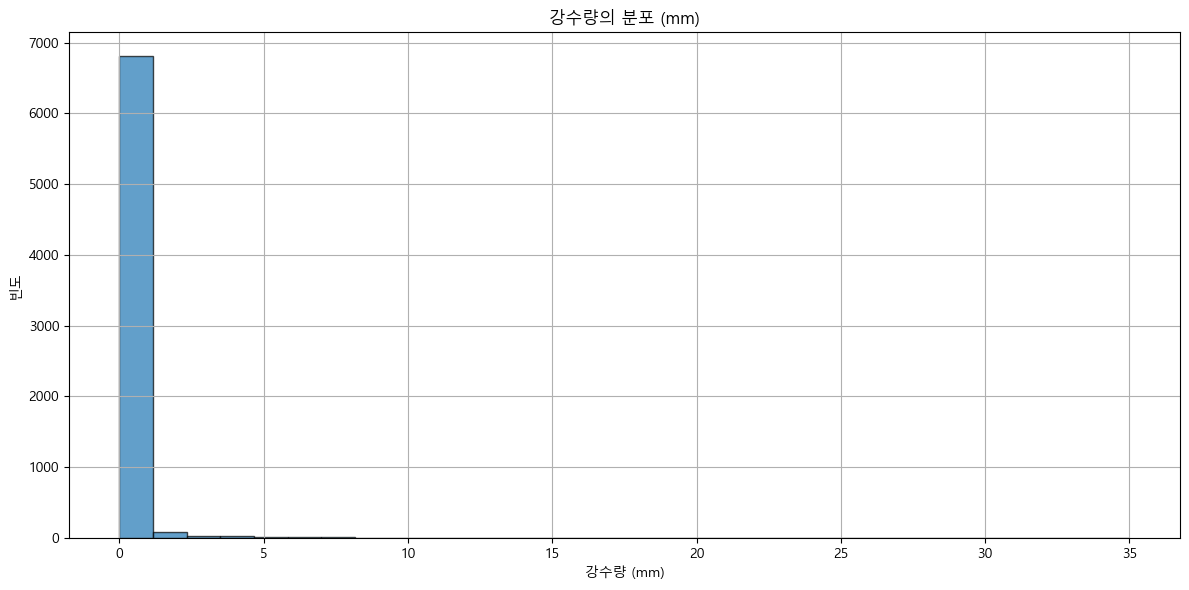

In [67]:
# 강수량 분포 확인하기
plt.figure(figsize=(12, 6))
plt.hist(data['Rainfall(mm)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('강수량 (mm)')
plt.ylabel('빈도')
plt.title('강수량의 분포 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# 강수량이 0인 데이터의 개수 확인
rainfall_zero_count = (data['Rainfall(mm)'] == 0).sum()
print(f"Number of records with zero rainfall: {rainfall_zero_count}")

Number of records with zero rainfall: 6587


- 7008개의 강수량 데이터 중 6588개의 데이터가 전부 0이다.

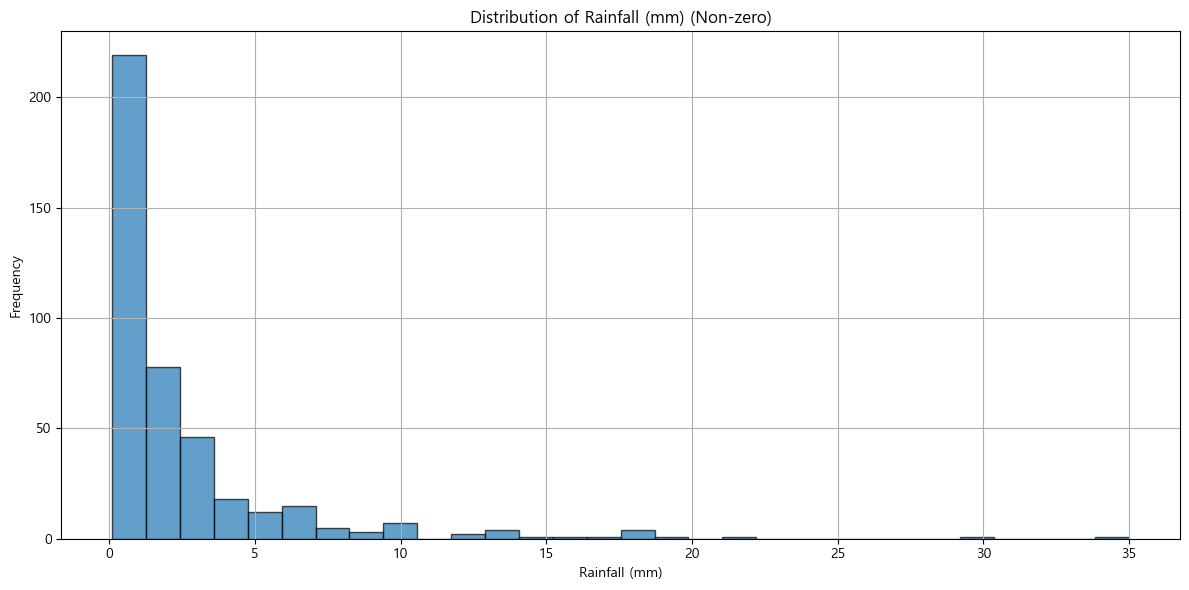

In [69]:
# 강수량이 0이 아닌 값만 필터링
non_zero_rainfall = data[data['Rainfall(mm)'] > 0]

# 강수량 분포 확인하기
plt.figure(figsize=(12, 6))
plt.hist(non_zero_rainfall['Rainfall(mm)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall (mm) (Non-zero)')
plt.grid(True)
plt.tight_layout()
plt.show()

- 0을 제외하여도 1을 넘지 않는 데이터가 훨씬 많음을 알 수 있다.

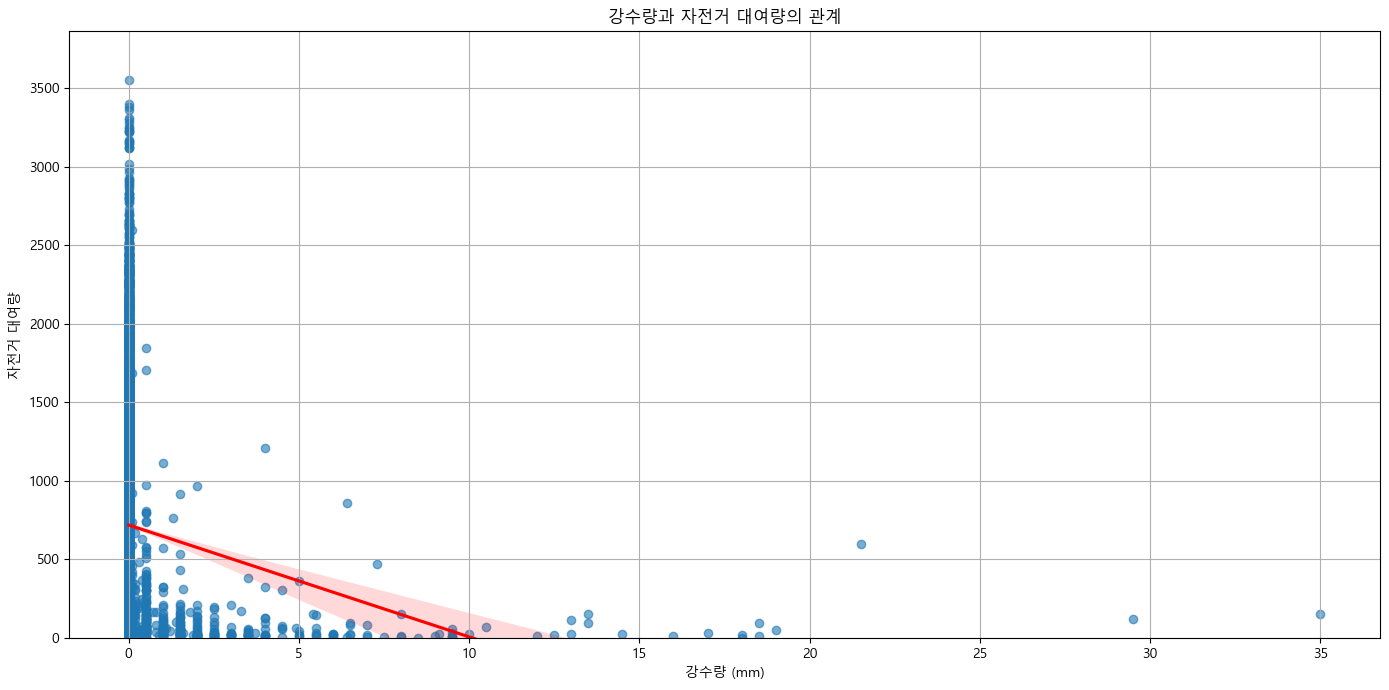

In [70]:
# 강수량과 자전거 대여량의 관계 시각화 (회귀선 포함)
plt.figure(figsize=(14, 7))
sns.regplot(x='Rainfall(mm)', y='Rented Bike Count', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('강수량과 자전거 대여량의 관계')
plt.xlabel('강수량 (mm)')
plt.ylabel('자전거 대여량')
plt.ylim(0)  # y축의 최소값을 0으로 설정
plt.grid(True)
plt.tight_layout()
plt.show()

> 강수량이 많을수록 자전거 대여량은 적고 강수량이 적을수록 자전거 대여량은 많을 것이라는 가설을 세웠고 위의 산점도를 통해 시각적으로 확인하였다.

- 자전거 대여량도 강수량이 0일 때 월등히 많으므로 강수량이 0인 것, 0이 아닌 것 이렇게 둘로 나누어 자전거 대여량을 확인하는 것이 효과적일 것이다.

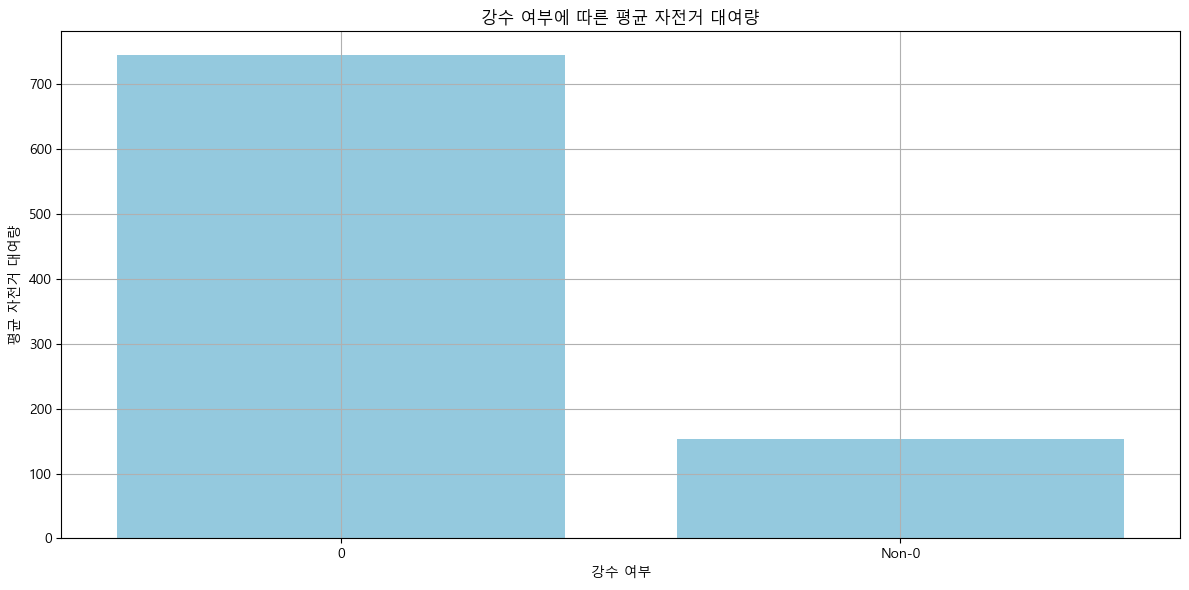

In [71]:
# 강수량이 0인 데이터와 0이 아닌 데이터를 구분
data['Rainfall Category'] = data['Rainfall(mm)'].apply(lambda x: '0' if x == 0 else 'Non-0')

# 각 그룹의 자전거 대여량 평균을 계산
average_rentals_by_rainfall = data.groupby('Rainfall Category')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Rainfall Category', y='Rented Bike Count', data=average_rentals_by_rainfall, color='skyblue')
plt.xlabel('강수 여부')
plt.ylabel('평균 자전거 대여량')
plt.title('강수 여부에 따른 평균 자전거 대여량')
plt.grid(True)
plt.tight_layout()
plt.show()

- 강수량이 0일 때, 자전거 대여량이 훨씬 많다는 합리적인 결론을 낼 수 있다.

> 일반적으로 대한민국은 여름에 강수량이 많고 겨울에 강수량이 적다. 아래 그래프에서 단순히 확인한다.

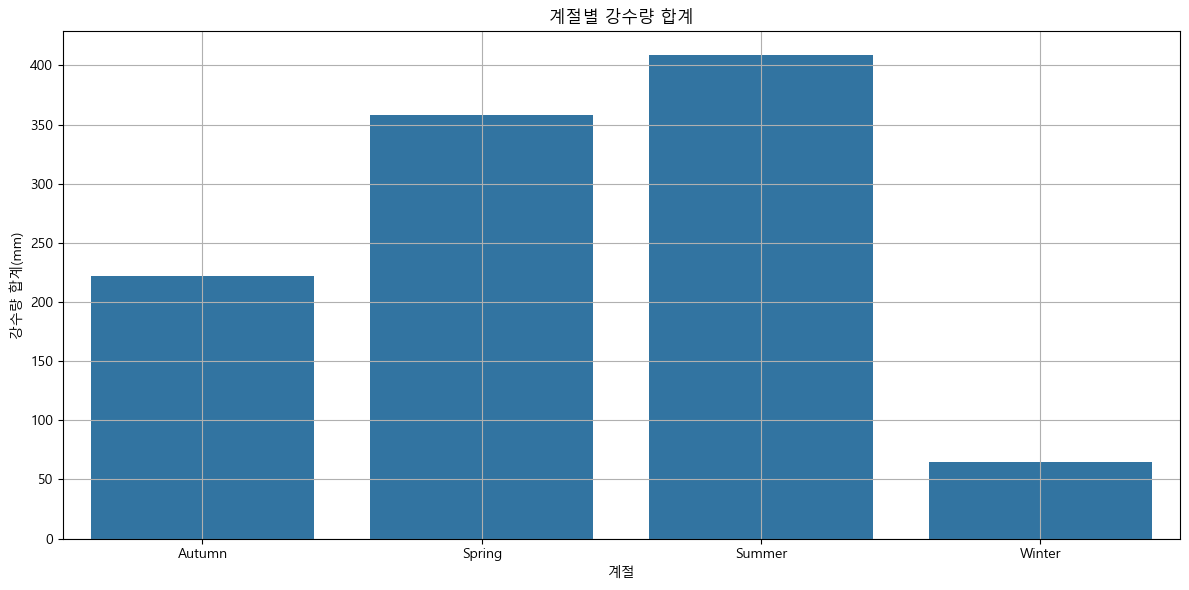

In [72]:
# 계절별 강수량 분석
seasonal_rainfall = data.groupby('Seasons')['Rainfall(mm)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Seasons', y='Rainfall(mm)', data=seasonal_rainfall)
plt.xlabel('계절')
plt.ylabel('강수량 합계(mm)')
plt.title('계절별 강수량 합계')
plt.grid(True)
plt.tight_layout()
plt.show()

    7. 강설량

In [73]:
data['Snowfall (cm)'].describe()

count    7007.000000
mean        0.075310
std         0.440967
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64

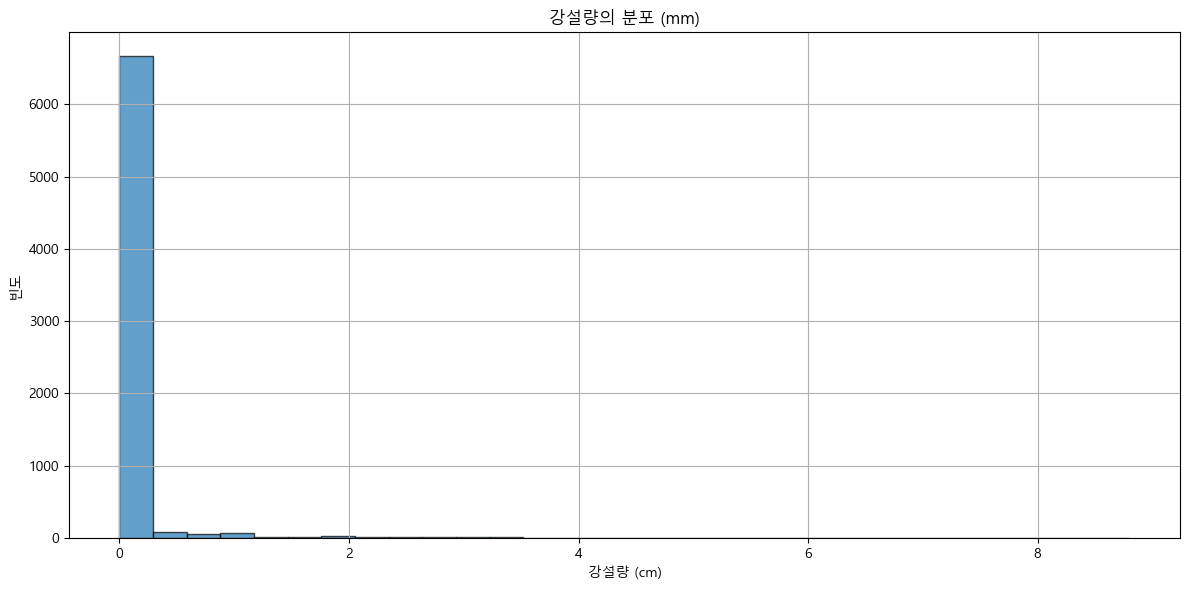

In [74]:
# 강설량 분포 확인하기
plt.figure(figsize=(12, 6))
plt.hist(data['Snowfall (cm)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('강설량 (cm)')
plt.ylabel('빈도')
plt.title('강설량의 분포 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# 강설량이 0인 데이터의 개수 확인
snowfall_zero_count = (data['Snowfall (cm)'] == 0).sum()
print(f"Number of records with zero snowfall: {snowfall_zero_count}")

Number of records with zero snowfall: 6651


- 365개의 데이터 중 347개의 데이터가 0이다.

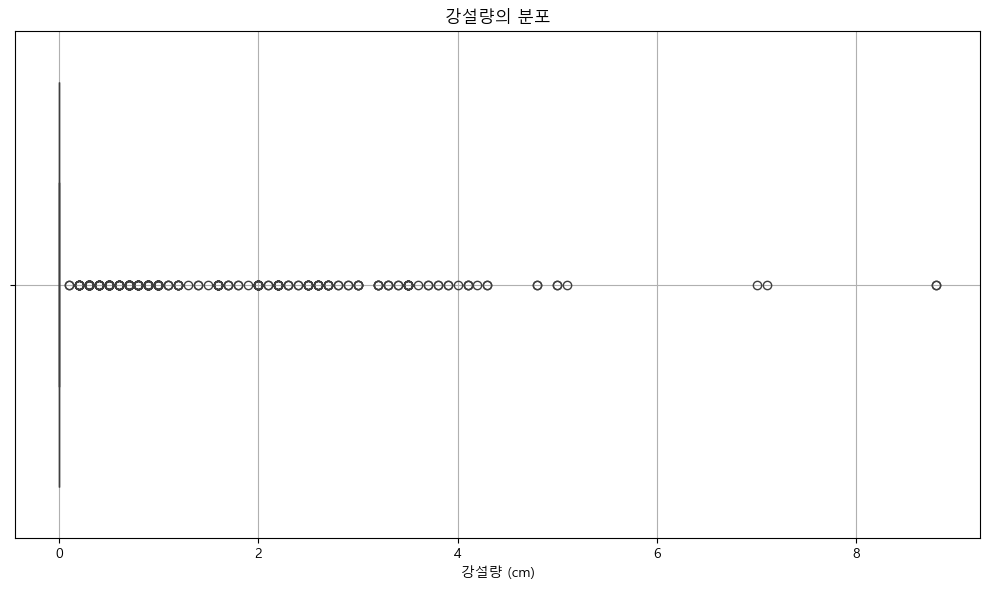

In [76]:
# 강설량의 분포를 박스플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Snowfall (cm)'])
plt.title('강설량의 분포')
plt.xlabel('강설량 (cm)')
plt.grid(True)
plt.tight_layout()
plt.show()

> 가설  1. 강설량이 많으면 자전거 대여량이 적고 강설량이 적으면 자전거 대여량이 많을 것이다.  

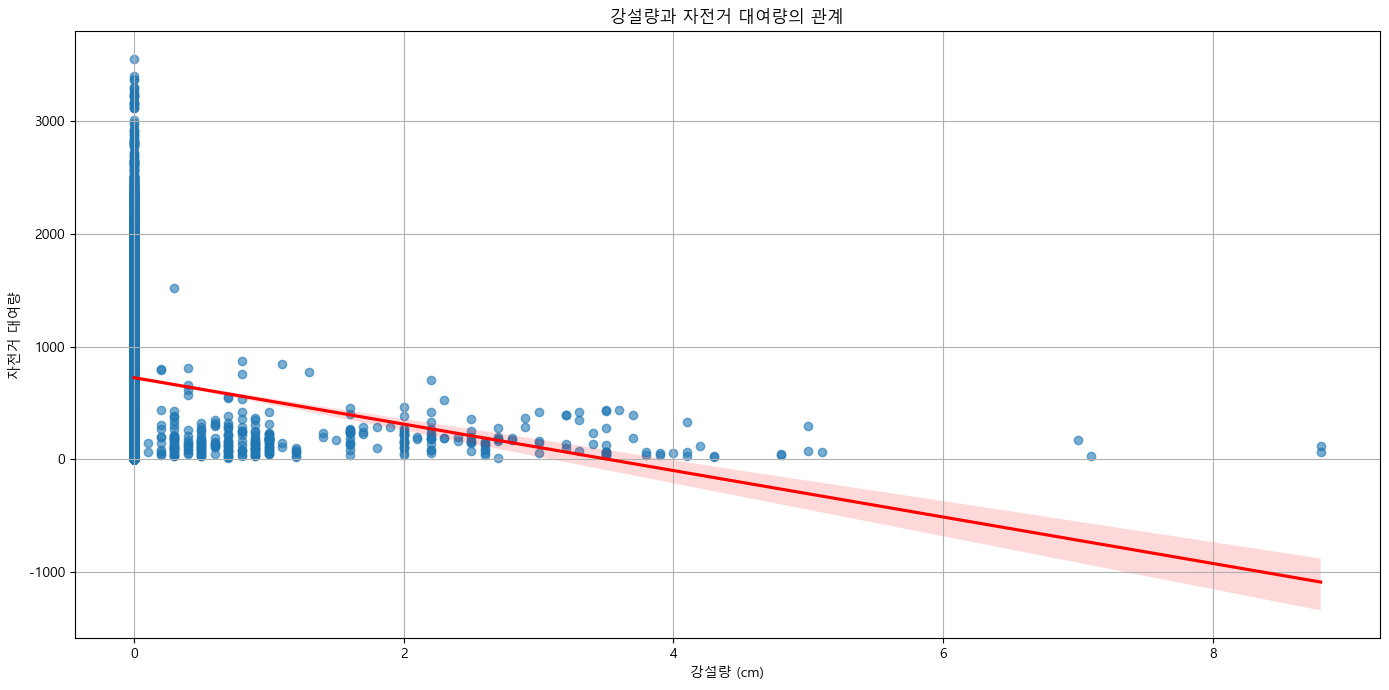

In [77]:
# 강설량과 자전거 대여량의 관계 시각화 (회귀선 포함)
plt.figure(figsize=(14, 7))
sns.regplot(x='Snowfall (cm)', y='Rented Bike Count', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('강설량과 자전거 대여량의 관계')
plt.xlabel('강설량 (cm)')
plt.ylabel('자전거 대여량')
plt.grid(True)
plt.tight_layout()
plt.show()

> 가설 2. 일정 강설량을 넘어서면 자전거 이용이 거의 없을 것이다.  
=> 위 산점도만 봐도 알 수 있듯이 1을 기준으로 좌우의 데이터 수가 차이가 많이 난다.  
따라서 특정 임계값을 설정해서 자전거 대여량을 비교하는 것은 더 많은 데이터가 확보된 다음에 하는 것이 좋을 것 같다.

> 마지막으로 월별 강설량과 자전거 대여량의 관계를 알아보자.

In [78]:
# 월별 평균 강설량 계산
monthly_snowfall = data.groupby('월')['Snowfall (cm)'].mean()

# 월별 평균 자전거 대여량 계산
monthly_rentals = data.groupby('월')['Rented Bike Count'].mean()

# 두 데이터를 하나의 데이터프레임으로 결합
monthly_data = pd.DataFrame({
    'Month': monthly_snowfall.index,
    'Average Snowfall (cm)': monthly_snowfall.values,
    'Average Rented Bike Count': monthly_rentals.values
})

# 월 기준으로 정렬
monthly_data.sort_values('Month', inplace=True)

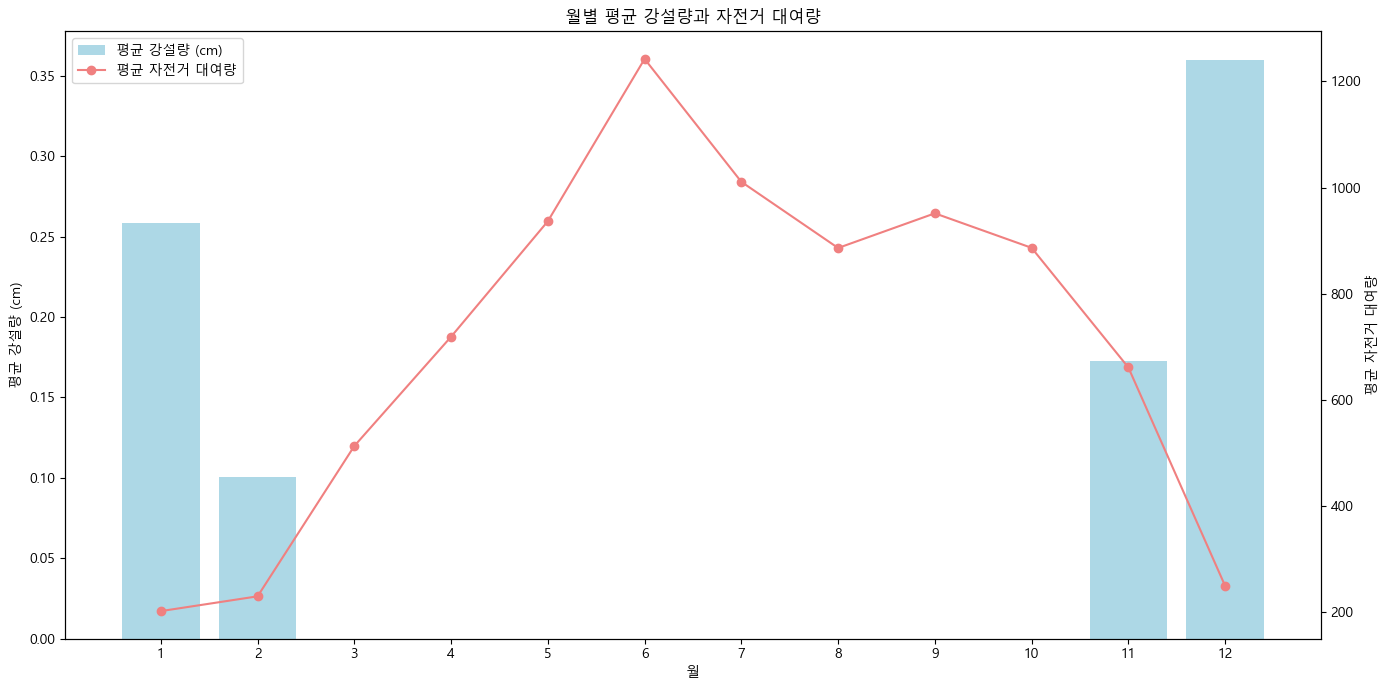

In [79]:
# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

# 막대 그래프: 월별 평균 강설량
bars = ax1.bar(monthly_data['Month'], monthly_data['Average Snowfall (cm)'], color='lightblue', label='평균 강설량 (cm)')
ax1.set_xlabel('월')
ax1.set_ylabel('평균 강설량 (cm)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(monthly_data['Month'])
ax1.set_xticklabels(monthly_data['Month'])

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 꺾은선 그래프: 월별 평균 자전거 대여량
line = ax2.plot(monthly_data['Month'], monthly_data['Average Rented Bike Count'], color='lightcoral', marker='o', label='평균 자전거 대여량')
ax2.set_ylabel('평균 자전거 대여량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('월별 평균 강설량과 자전거 대여량')

# 범례 설정
bars_legend = [bars]
line_legend = line
ax1.legend(bars_legend + line_legend, ['평균 강설량 (cm)', '평균 자전거 대여량'], loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

산점도와 마찬가지로 이 그래프에서도 강설량이 많을 때 대체로 자전거 대여량이 급감소했음을 확인할 수 있다.

In [80]:
# 강설량과 자전거 대여량의 상관계수 계산
correlation = data['Snowfall (cm)'].corr(data['Rented Bike Count'])
print(f"강설량과 자전거 대여량의 상관계수: {correlation:.4f}")

강설량과 자전거 대여량의 상관계수: -0.1404


강한 음의 상관관계를 가질 것이라 예상했는데 아니었다.

    8. 풍속

In [81]:
data['Wind speed (m/s)'].describe()

count    7007.000000
mean        1.746022
std         0.969659
min         0.100000
25%         1.000000
50%         1.600000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

0이라는 이상치가 없음을 확인 (위에서 이상치 처리함)

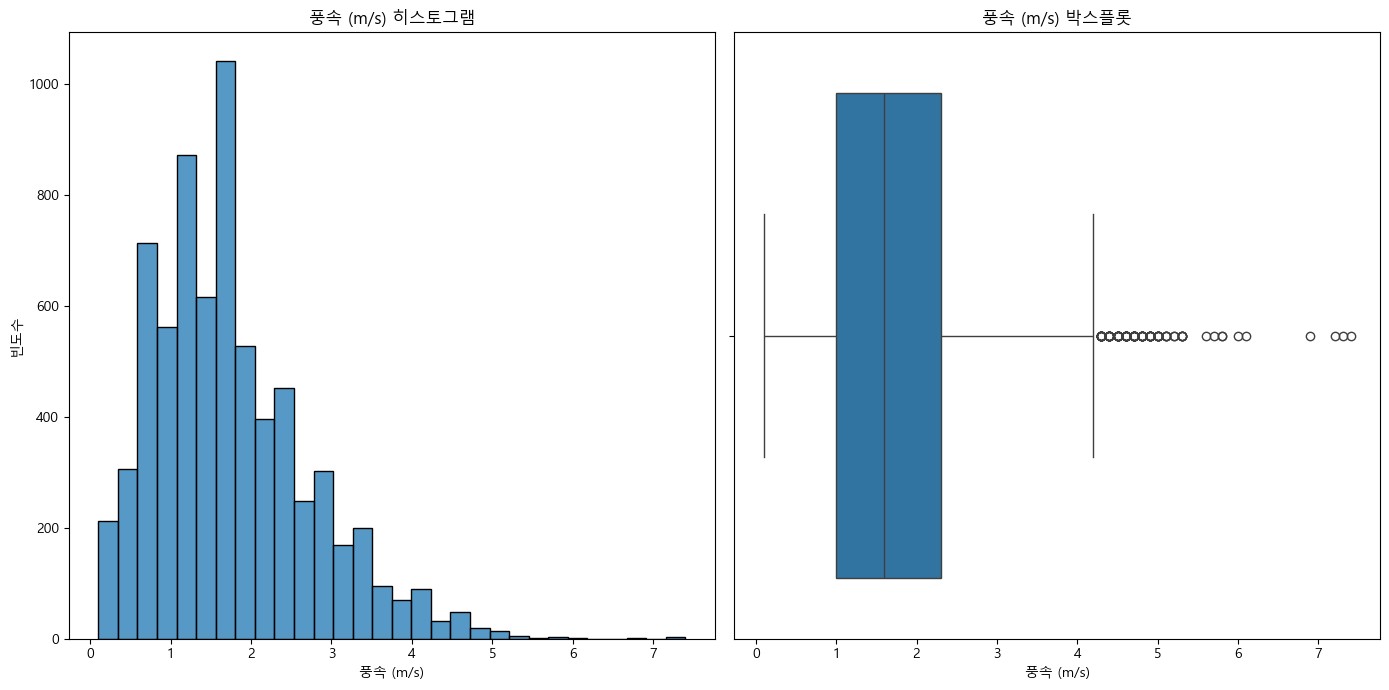

In [82]:
# 풍속 변수의 분포를 히스토그램과 박스플롯으로 시각화
plt.figure(figsize=(14, 7))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(data['Wind speed (m/s)'].dropna(), bins=30, kde=False)
plt.title('풍속 (m/s) 히스토그램')
plt.xlabel('풍속 (m/s)')
plt.ylabel('빈도수')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Wind speed (m/s)'])
plt.title('풍속 (m/s) 박스플롯')
plt.xlabel('풍속 (m/s)')

plt.tight_layout()
plt.show()

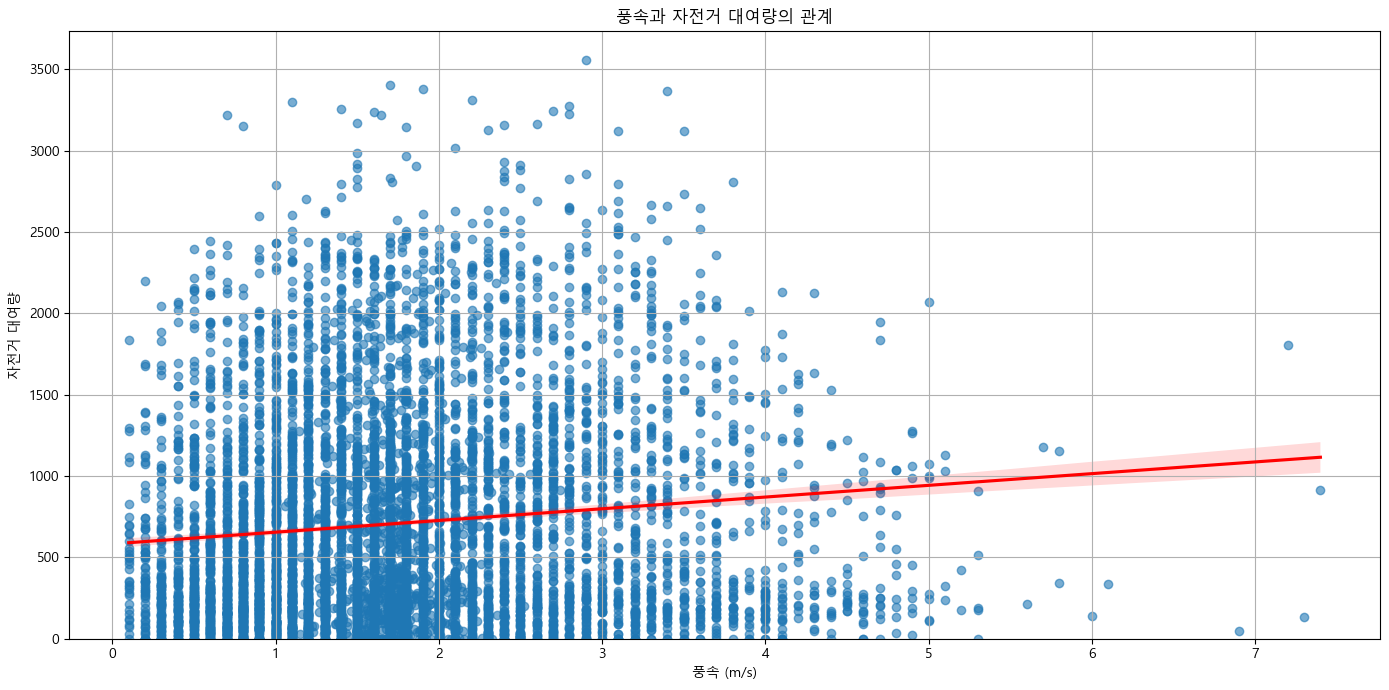

In [83]:
# 풍속과 자전거 대여량의 관계 시각화 (회귀선 포함)
plt.figure(figsize=(14, 7))
sns.regplot(x='Wind speed (m/s)', y='Rented Bike Count', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('풍속과 자전거 대여량의 관계')
plt.xlabel('풍속 (m/s)')
plt.ylabel('자전거 대여량')
plt.ylim(0)  # y축의 최소값을 0으로 설정
plt.grid(True)
plt.tight_layout()
plt.show()

- 구간당 데이터의 개수가 유사하도록 풍속을 구간으로 나눈 뒤 구간 풍속 당 자전거 대여량을 알아본다.

In [84]:
# 풍속을 구간으로 나누기 (구간당 데이터의 개수가 유사하도록)
categories, bins = pd.qcut(data['Wind speed (m/s)'], q=4, retbins=True)

# 구간 라벨을 구간 경계로 설정
data['Wind Speed Category'] = pd.cut(data['Wind speed (m/s)'], bins=bins, labels=[f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)])

# 구간별 데이터 개수 확인
category_counts = data['Wind Speed Category'].value_counts().sort_index()
print("구간별 데이터 개수:")
print(category_counts)

구간별 데이터 개수:
Wind Speed Category
0.10 - 1.00    1758
1.00 - 1.60    1768
1.60 - 2.30    1851
2.30 - 7.40    1594
Name: count, dtype: int64


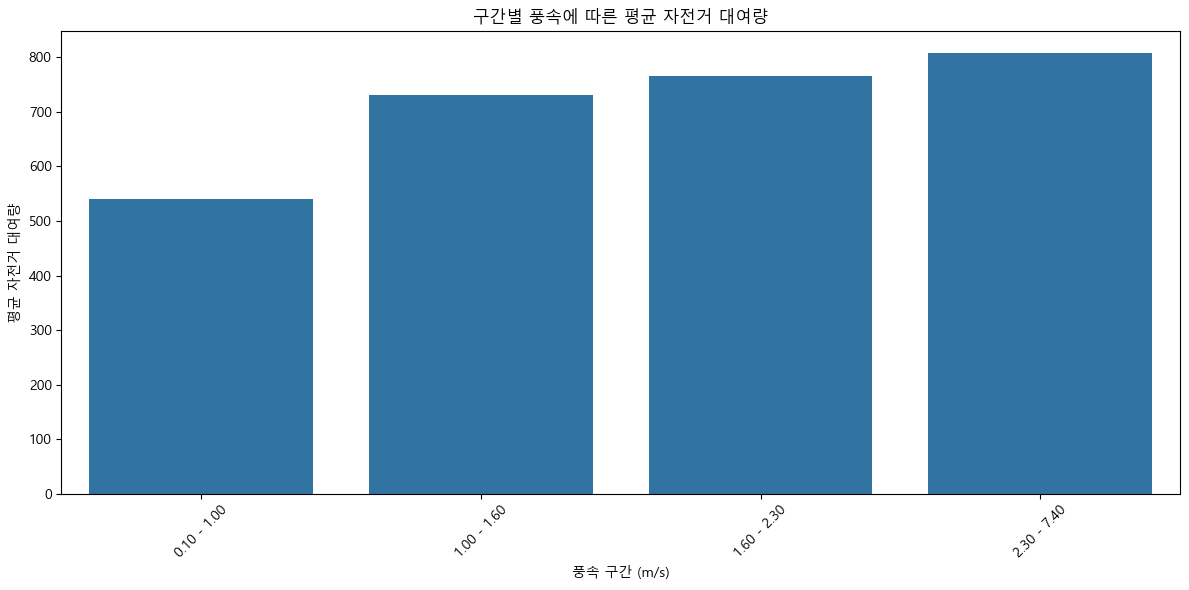

In [85]:
# 구간별 자전거 대여량의 평균 계산
category_rentals = data.groupby('Wind Speed Category', observed=True)['Rented Bike Count'].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=category_rentals.index, y=category_rentals.values)
plt.title('구간별 풍속에 따른 평균 자전거 대여량')
plt.xlabel('풍속 구간 (m/s)')
plt.ylabel('평균 자전거 대여량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> '풍속' 도메인 지식  
풍속 0.3~1.5m/s 정도의 바람 :  바람개비에 감지되지 않는 풍속  
풍속 5.5~7.9m/s 정도의 바람 : 건들바람으로 먼지가 일고 종이 조각이 날리는 정도의 바람  
풍속 8.0~10.7m/s 정도의 바람 : 강물에 잔물결이 일어나는 정도

바람이 거의 불지 않을 때보다 선선하다고 느낄 정도의 바람이 불 때 자전거 대여량이 더 많다.

    9. 일조량

In [86]:
data['Solar Radiation (MJ/m2)'].describe()

count    7007.000000
mean        0.574658
std         0.874564
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64

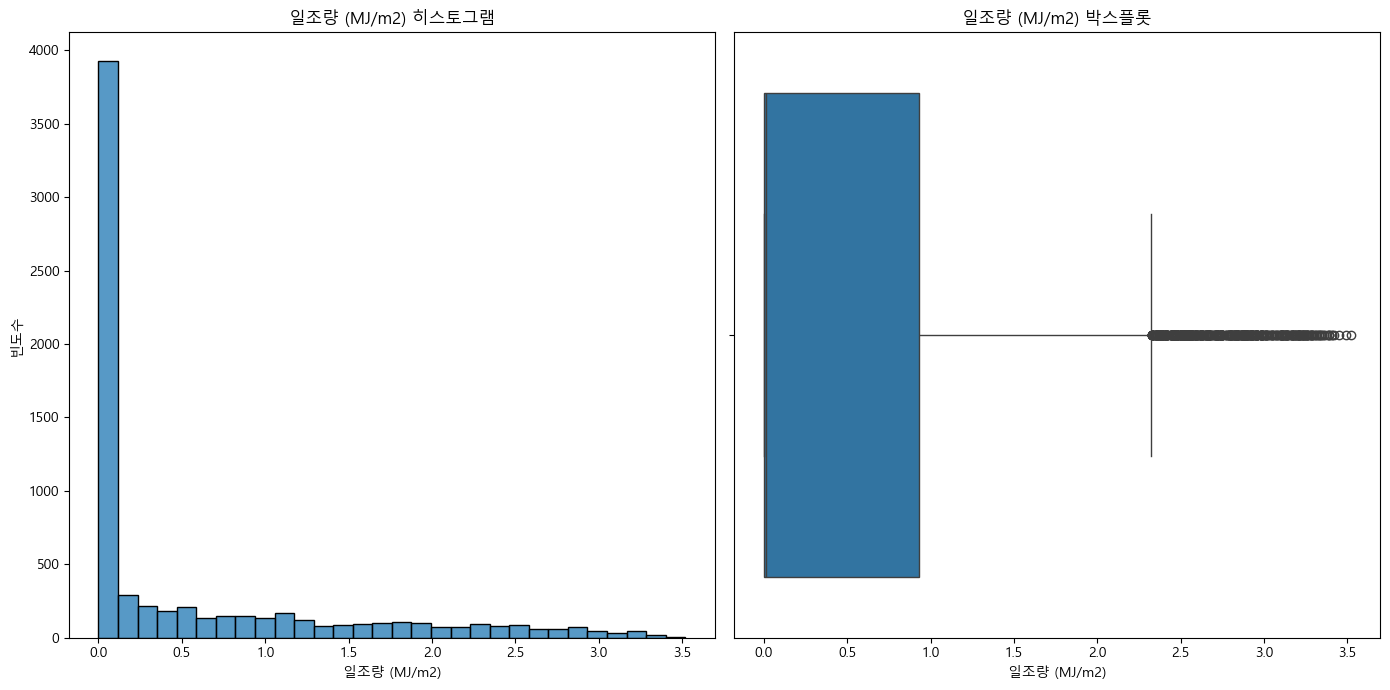

In [87]:
# 풍속 변수의 분포를 히스토그램과 박스플롯으로 시각화
plt.figure(figsize=(14, 7))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(data['Solar Radiation (MJ/m2)'].dropna(), bins=30, kde=False)
plt.title('일조량 (MJ/m2) 히스토그램')
plt.xlabel('일조량 (MJ/m2)')
plt.ylabel('빈도수')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Solar Radiation (MJ/m2)'])
plt.title('일조량 (MJ/m2) 박스플롯')
plt.xlabel('일조량 (MJ/m2)')

plt.tight_layout()
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler

일조량과 기온은 상관관계가 있을 것 같다.
일조량과 기온의 단위가 맞지 않으므로 상관관계를 파악하려면 표준화를 해야한다.

In [89]:
# 일조량과 기온의 상관관계를 파악하기 위해 표준화
scaler = StandardScaler()
data[['Temperature(°C)_std', 'Solar Radiation (MJ/m2)_std']] = scaler.fit_transform(data[['Temperature(°C)', 'Solar Radiation (MJ/m2)']])

# 표준화된 변수 간의 상관계수 계산
correlation = data['Temperature(°C)_std'].corr(data['Solar Radiation (MJ/m2)_std'])
print(f"일조량과 기온의 표준화된 상관계수: {correlation:.4f}")

# 표준화된거 확인
data[['Temperature(°C)_std', 'Temperature(°C)_std']].head()

일조량과 기온의 표준화된 상관계수: 0.3529


,Temperature(°C)_std,Temperature(°C)_std
0,0.313413,0.313413
1,0.848188,0.848188
2,-0.555596,-0.555596
3,0.864900,0.864900
4,0.906679,0.906679


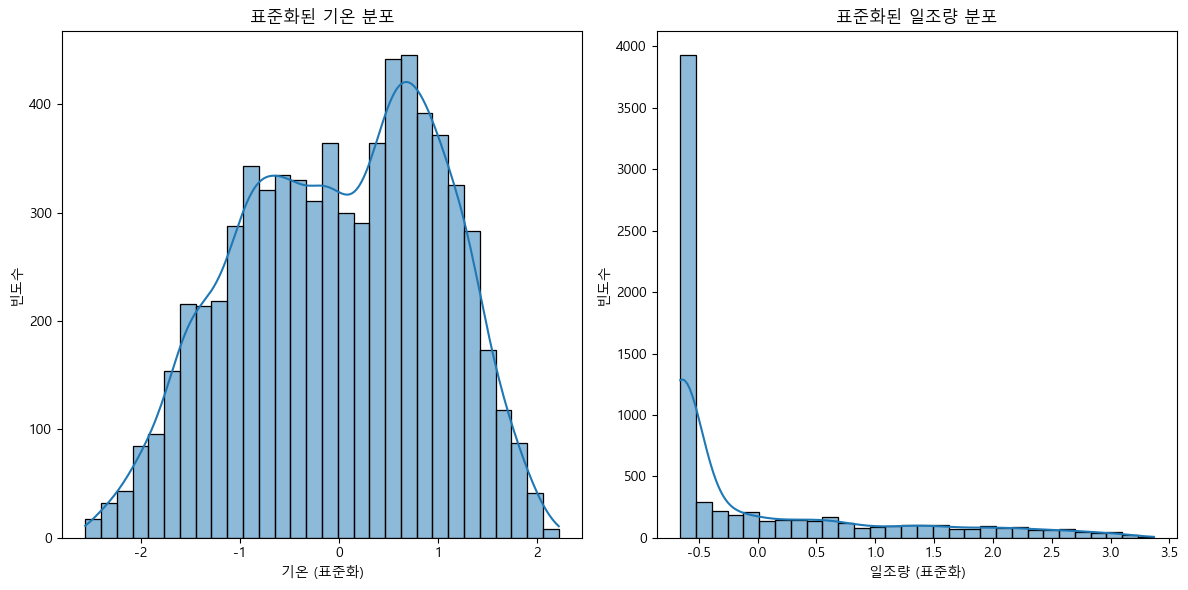

In [90]:
# 표준화된 변수의 분포 시각화
plt.figure(figsize=(12, 6))

# 표준화된 기온 분포
plt.subplot(1, 2, 1)
sns.histplot(data['Temperature(°C)_std'], bins=30, kde=True)
plt.title('표준화된 기온 분포')
plt.xlabel('기온 (표준화)')
plt.ylabel('빈도수')

# 표준화된 일조량 분포
plt.subplot(1, 2, 2)
sns.histplot(data['Solar Radiation (MJ/m2)_std'], bins=30, kde=True)
plt.title('표준화된 일조량 분포')
plt.xlabel('일조량 (표준화)')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()

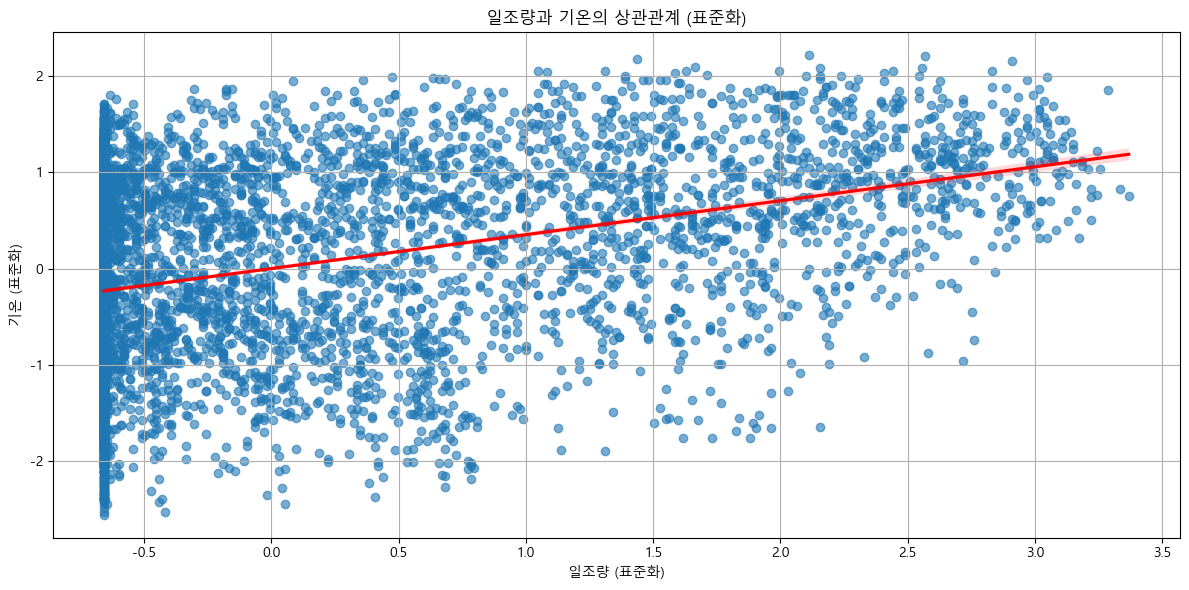

In [91]:
# 표준화된 변수 간의 상관관계 시각화 (회귀선 포함)
plt.figure(figsize=(12, 6))
sns.regplot(x='Solar Radiation (MJ/m2)_std', y='Temperature(°C)_std', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('일조량과 기온의 상관관계 (표준화)')
plt.xlabel('일조량 (표준화)')
plt.ylabel('기온 (표준화)')
plt.grid(True)
plt.tight_layout()
plt.show()

- 상관계수는 0.3752로 약한 양의 상관관계가 있음을 알 수 있다.

Text(0.5, 1.0, 'correlation heatmap')

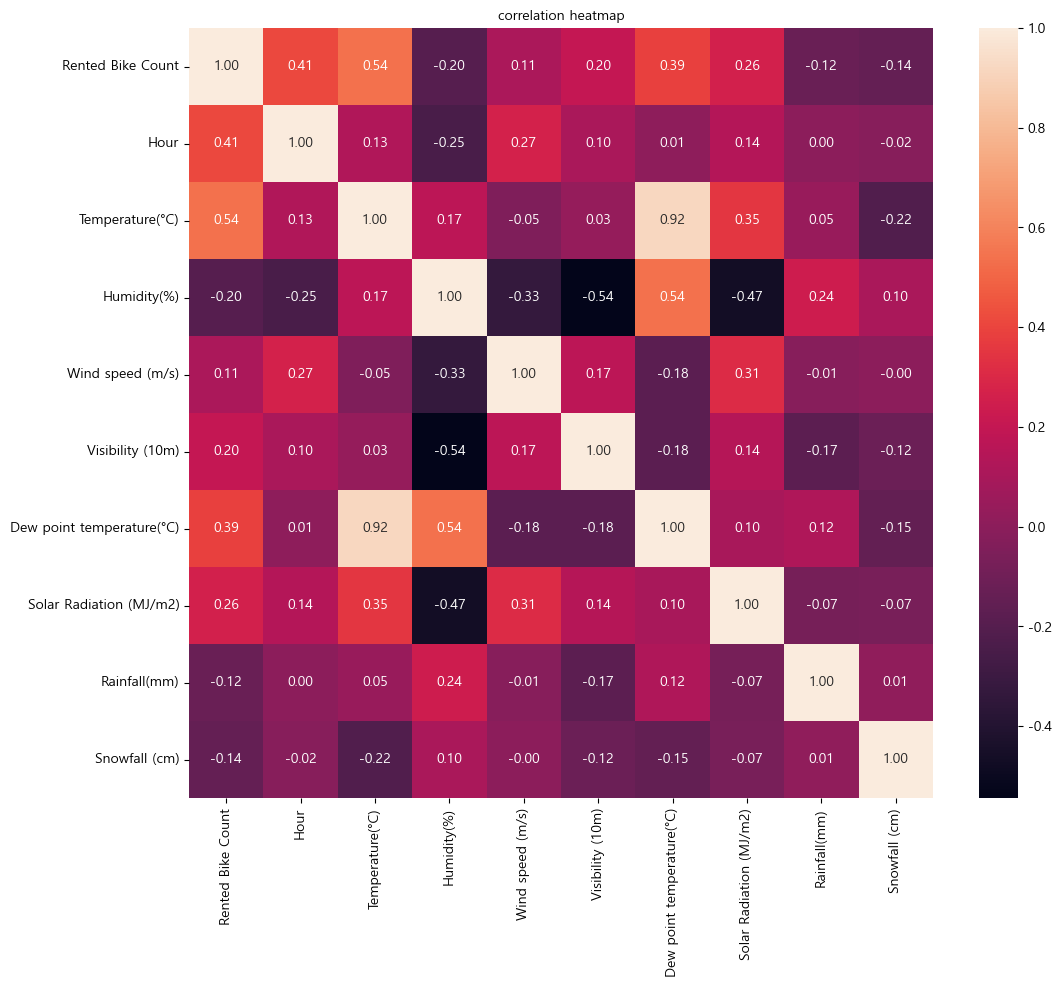

In [92]:
# 상관계수 히트맵 그리기
plt.figure(figsize=(12,10))  #사이즈 조정
sns.heatmap(data[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True,fmt='.2f') #annot는 값  표기
plt.title('correlation heatmap',fontproperties=fontprop) #상관계수 행렬 히트맵

In [93]:
#CSV file로 저장하기
file= 'C:/Users/pro_1030/Desktop/비어플/modified_train.csv'
data.to_csv(file, index=False)